# CO Data Aggregation Time Series Spline

Fits a 1-D smoothing spline to aggregated mean CO value for regular hexagon grid cells.

To convert from mol/m<sup>2</sup> to molecules/cm<sup>2</sup>, multiply by 6.022140857e+19 (6.022140857 * 10<sup>19</sup>).

# Environment Setup

In [1]:
# Load Notebook formatter
%load_ext nb_black
# %reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Import packages
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import radiance as rd
import sentinel as stl

<IPython.core.display.Javascript object>

In [3]:
# Set Options
# sns.set(font_scale=1.5, style="whitegrid")
sns.set(font_scale=1.5)
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
pd.set_option("precision", 15)
register_matplotlib_converters()

<IPython.core.display.Javascript object>

In [4]:
# Set working directory
os.chdir("..")
print(f"Working directory: {os.getcwd()}")

Working directory: C:\PSU\08-covid19-remote-sensing-fusion\00-git-repos\sentinel-5p-no2


<IPython.core.display.Javascript object>

# User-Defined Variables

In [5]:
# Set path to time series geopackage
hexagon_grid_time_series_path = os.path.join(
    "03-processed-data",
    "vector",
    "south-korea",
    "co_aggregate_daily_hexagon_grid_jul_2018_dec_2020.gpkg",
)

<IPython.core.display.Javascript object>

# Data Acquisition and Preprocessing

In [6]:
# Get cleaned time series data into dataframe
time_series_df = stl.clean_time_series(hexagon_grid_time_series_path)

<IPython.core.display.Javascript object>

In [7]:
# Check dataframe
time_series_df.head()

A-24               B-24  \
date                                                              
2018-07-01 03:02:35+00:00                NaN                NaN   
2018-07-01 04:44:04+00:00                NaN                NaN   
2018-07-02 04:25:03+00:00                NaN                NaN   
2018-07-03 04:06:00+00:00  0.026198022088355  0.024474350106335   
2018-07-04 03:46:57+00:00                NaN                NaN   

                                        C-24               D-24  \
date                                                              
2018-07-01 03:02:35+00:00                NaN                NaN   
2018-07-01 04:44:04+00:00                NaN                NaN   
2018-07-02 04:25:03+00:00                NaN  0.031395409957485   
2018-07-03 04:06:00+00:00  0.024364655364254  0.024686606325159   
2018-07-04 03:46:57+00:00                NaN                NaN   

                                        E-24               F-24  \
date                                                              
2018-07-01 03:02:35+00:00                NaN                NaN   
2018-07-01 04:44:04+00:00                NaN                NaN   
2018-07-02 04:25:03+00:00                NaN                NaN   
2018-07-03 04:06:00+00:00  0.026678715371976  0.023642812892842   
2018-07-04 03:46:57+00:00                NaN  0.034539307941171   

                                        G-24               H-24  \
date                                                              
2018-07-01 03:02:35+00:00                NaN                NaN   
2018-07-01 04:44:04+00:00                NaN  0.029065345688885   
2018-07-02 04:25:03+00:00                NaN                NaN   
2018-07-03 04:06:00+00:00                NaN                NaN   
2018-07-04 03:46:57+00:00  0.037509510723066  0.033901713875151   

                                        I-24               J-24  \
date                                                              
2018-07-01 03:02:35+00:00                NaN                NaN   
2018-07-01 04:44:04+00:00  0.028316306243700  0.029171545832979   
2018-07-02 04:25:03+00:00                NaN                NaN   
2018-07-03 04:06:00+00:00                NaN                NaN   
2018-07-04 03:46:57+00:00  0.037739109146323  0.034115998563524   

                                        K-24               L-24  \
date                                                              
2018-07-01 03:02:35+00:00                NaN                NaN   
2018-07-01 04:44:04+00:00                NaN                NaN   
2018-07-02 04:25:03+00:00                NaN                NaN   
2018-07-03 04:06:00+00:00                NaN  0.023123384458904   
2018-07-04 03:46:57+00:00  0.031931566961172  0.032464814925525   

                                       M-24               N-24  \
date                                                             
2018-07-01 03:02:35+00:00               NaN                NaN   
2018-07-01 04:44:04+00:00               NaN                NaN   
2018-07-02 04:25:03+00:00               NaN                NaN   
2018-07-03 04:06:00+00:00  0.02450376069116  0.024788894524287   
2018-07-04 03:46:57+00:00  0.03279559729300  0.031698189526722   

                                        O-24               P-24  \
date                                                              
2018-07-01 03:02:35+00:00                NaN                NaN   
2018-07-01 04:44:04+00:00                NaN                NaN   
2018-07-02 04:25:03+00:00                NaN                NaN   
2018-07-03 04:06:00+00:00  0.024494931301788  0.023216722677316   
2018-07-04 03:46:57+00:00  0.032628590150048  0.031506642654517   

                                        Q-24              R-24  \
date                                                             
2018-07-01 03:02:35+00:00                NaN               NaN   
2018-07-01 04:44:04+00:00                NaN               NaN   
2018-07-02 04:25:03+00:

<IPython.core.display.Javascript object>

In [8]:
# Check dataframe
time_series_df.tail()

A-24               B-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00  0.040275030037575  0.041442188546336   
2020-11-29 03:53:04+00:00                NaN  0.042010750694413   
2020-11-30 03:34:00+00:00  0.043234110050395  0.040261406388724   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        C-24               D-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00  0.037474118947270  0.038416914629257   
2020-11-29 03:53:04+00:00  0.043350935104422  0.041845555639748   
2020-11-30 03:34:00+00:00  0.040322053720898  0.042538912317665   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        E-24               F-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00  0.038416914664735  0.038515639765727   
2020-11-29 03:53:04+00:00  0.042382030433290  0.042216847161612   
2020-11-30 03:34:00+00:00  0.049205955990693                NaN   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        G-24               H-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00  0.038680146165662  0.038904581044611   
2020-11-29 03:53:04+00:00  0.039917726157631  0.038499171125799   
2020-11-30 03:34:00+00:00                NaN                NaN   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        I-24               J-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00                NaN  0.037110093507069   
2020-11-29 03:53:04+00:00  0.038864951748314  0.040236259986716   
2020-11-30 03:34:00+00:00                NaN  0.042278574360178   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        K-24               L-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00  0.037852262420303  0.037873685499411   
2020-11-29 03:53:04+00:00  0.042402528030038  0.040188434272465   
2020-11-30 03:34:00+00:00  0.040304382137499  0.039765658949959   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        M-24               N-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00  0.036367237591255                NaN   
2020-11-29 03:53:04+00:00                NaN  0.040260844010462   
2020-11-30 03:34:00+00:00  0.038646728808026  0.039985705658021   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        O-24               P-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00                NaN  0.041280397611998   
2020-11-29 03:53:04+00:00  0.037259037815719  0.037259038684571   
2020-11-30 03:34:00+00:00  0.036881397723149  0.042206441564898   
2020-12-08 02:42:57+00:00                NaN                NaN   

                                        Q-24               R-24  \
date                                                              
2020-11-28 02:30:40+00:00                NaN                NaN   
2020-11-28 04:12:10+00:00  0.039762079022337  0.039532287057790   
2020-11-29 0

<IPython.core.display.Javascript object>

# Data Processing

# Data Post-Processing

# Data Visualization

## Spline Plots

Data points are daily, and at most twice daily. Spline of degree 3 is created from 24 points per day (hourly frequency).

The best comparison so far with the available data is to create smoothing splines from July 1, 2018 - October 31, 2019 and July 1, 2020 - October 31, 2020. This includes a two-month plot date buffer on each end so that the plot can show September 1 to August 31 for 2018/2019 and 2019/2020. 

Because the data starts on July 1, 2018, showing a plot date from July 1 with no previous buffer skews the start of the plot somewhat. Also, showing the plots of the individual years is less helpful at this time for two reasons:

* 2018 only has 6 months worth of data (Jul-Dec); and,
* The peak NO2 in January gets cut in half with the yearly plot (and there is not yet data for Dec 2020).

Plotting within the data constraints (July 1, 2018 start and January peak) makes it so that seasonal plots are more useful than strictly by year.

###  Seoul Area - High

#### Grid J-6

In [9]:
# Set grid cell (for saving figure)
grid_cell = "J-6"

<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2018-jun-2019-grid-j6.png


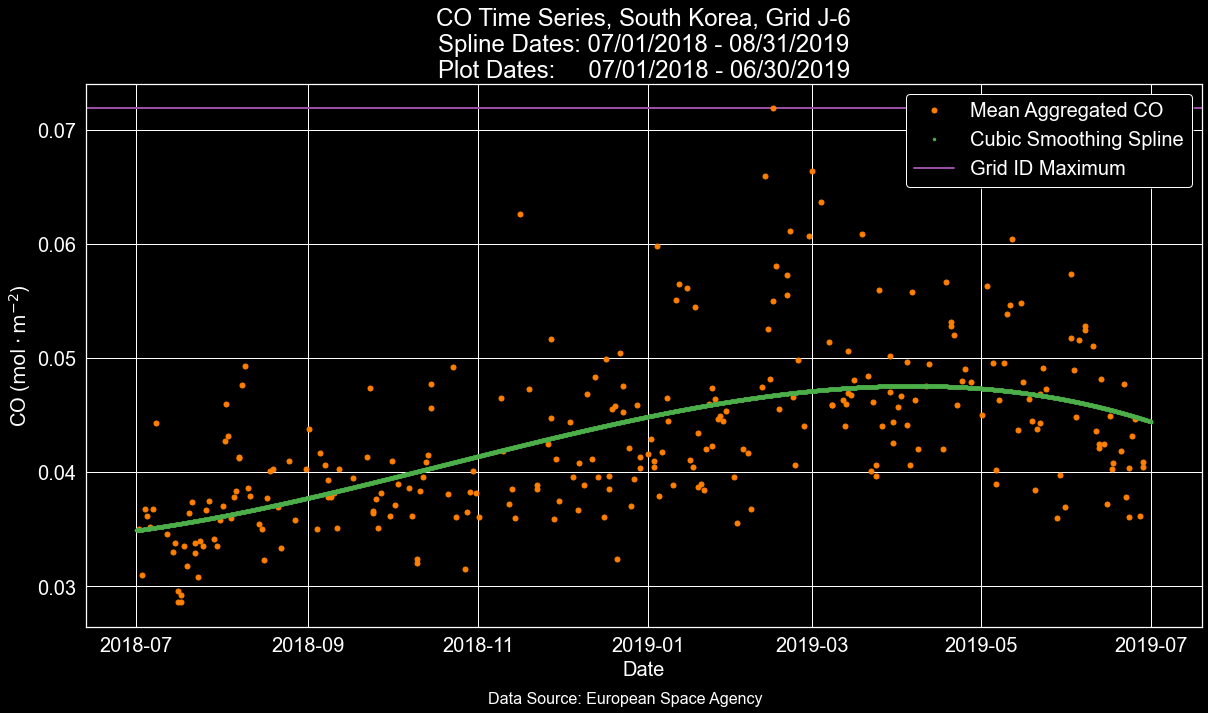

<IPython.core.display.Javascript object>

In [10]:
# Plot data and spline for 2018-07-01 to 2019-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-08-31",
    plot_start="2018-07-01",
    plot_end="2019-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-jun-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

In [11]:
# Get spline coefficients, knots, and residual
coefficients, knots, residual = stl.get_spline_details(spline)
print(f"Coefficients: {coefficients}")
print(f"Knots:        {knots}")
print(f"Residual:     {residual}")

Coefficients: [0.03489682 0.03968925 0.0593213  0.03737269]
Knots:        ['2018-07-01T03:02:35.000000000' '2019-08-31T04:52:48.000000000']
Residual:     0.012305202732601906


<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2019-jun-2020-grid-j6.png


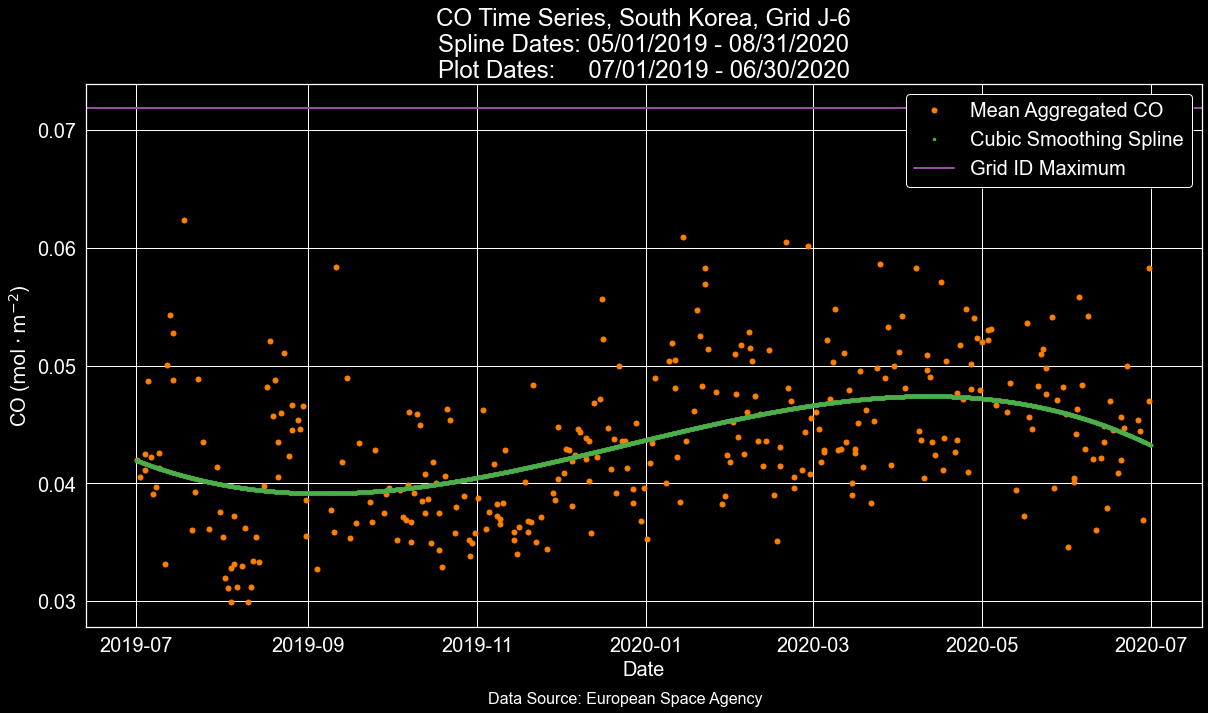

<IPython.core.display.Javascript object>

In [12]:
# Plot data and spline for 2019-07-01 to 2020-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-05-01",
    spline_end="2020-08-31",
    plot_start="2019-07-01",
    plot_end="2020-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2019-jun-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2020-grid-j6.png


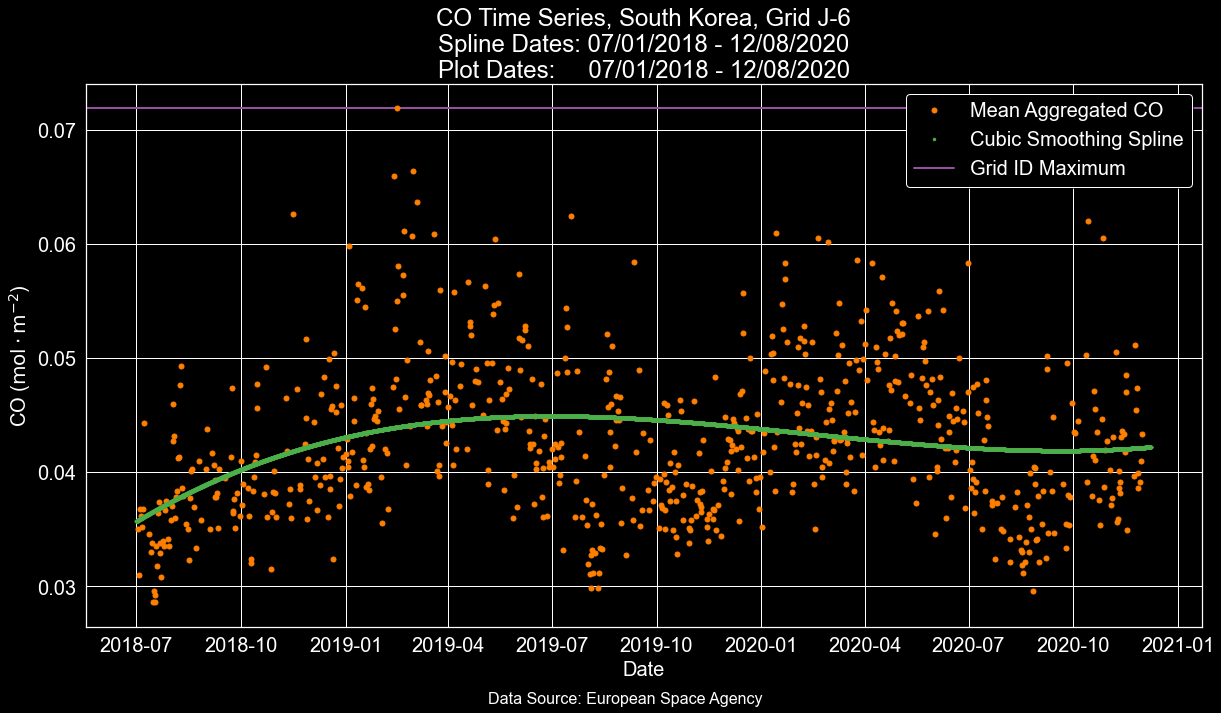

<IPython.core.display.Javascript object>

In [13]:
# Plot data and spline for full time span
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2020-12-08",
    plot_start="2018-07-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2018-grid-j6.png


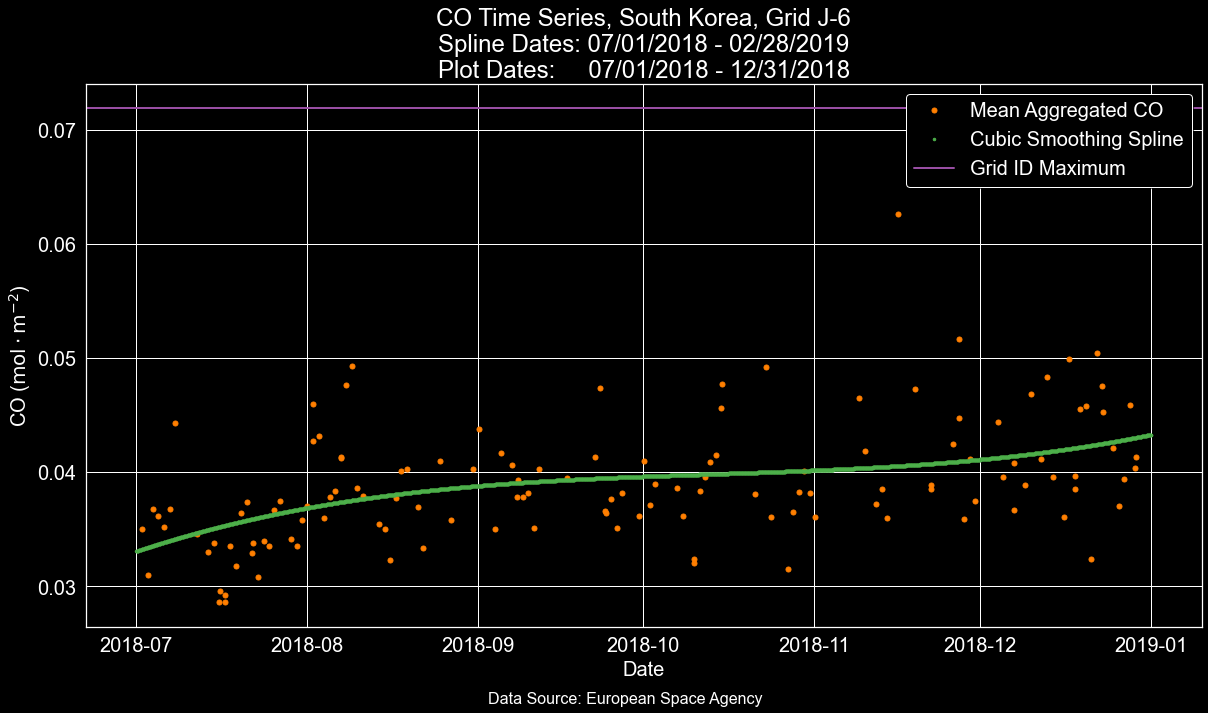

<IPython.core.display.Javascript object>

In [14]:
# Plot data and spline for 2018
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-02-28",
    plot_start="2018-07-01",
    plot_end="2018-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2018-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

rd.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2019-dec-2019-grid-j6.png


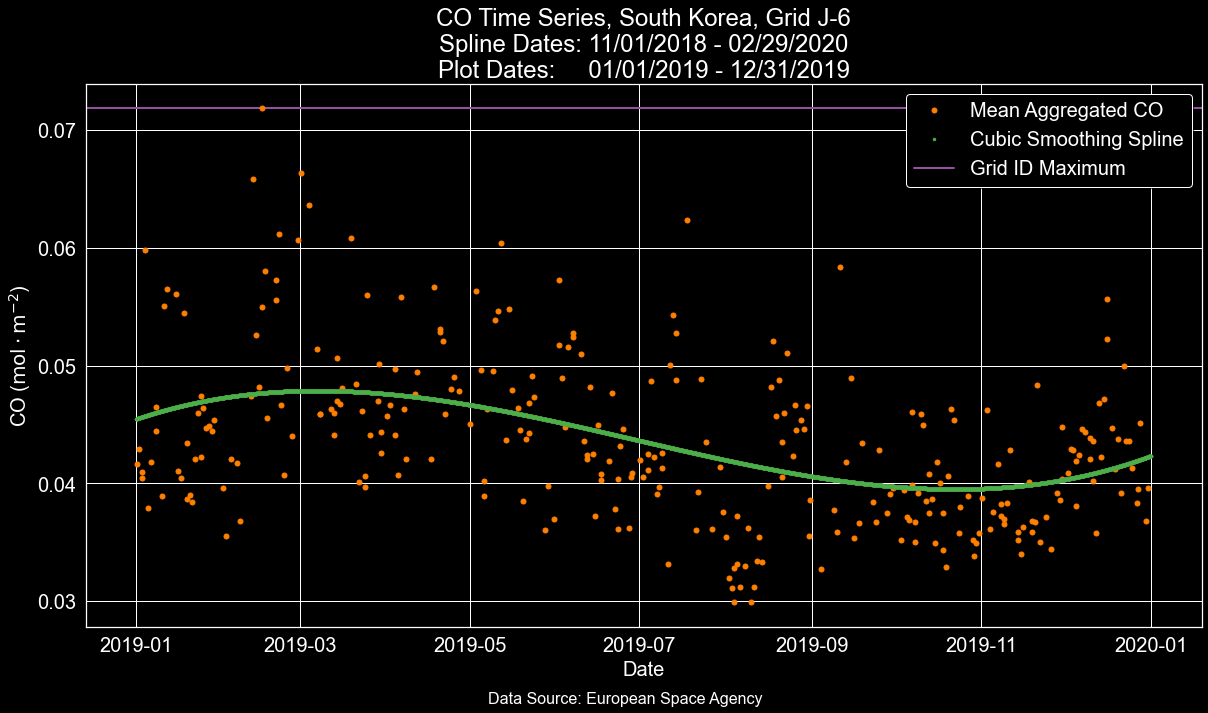

<IPython.core.display.Javascript object>

In [15]:
# Plot data and spline for 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-11-01",
    spline_end="2020-02-29",
    plot_start="2019-01-01",
    plot_end="2019-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2019-dec-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2020-dec-2020-grid-j6.png


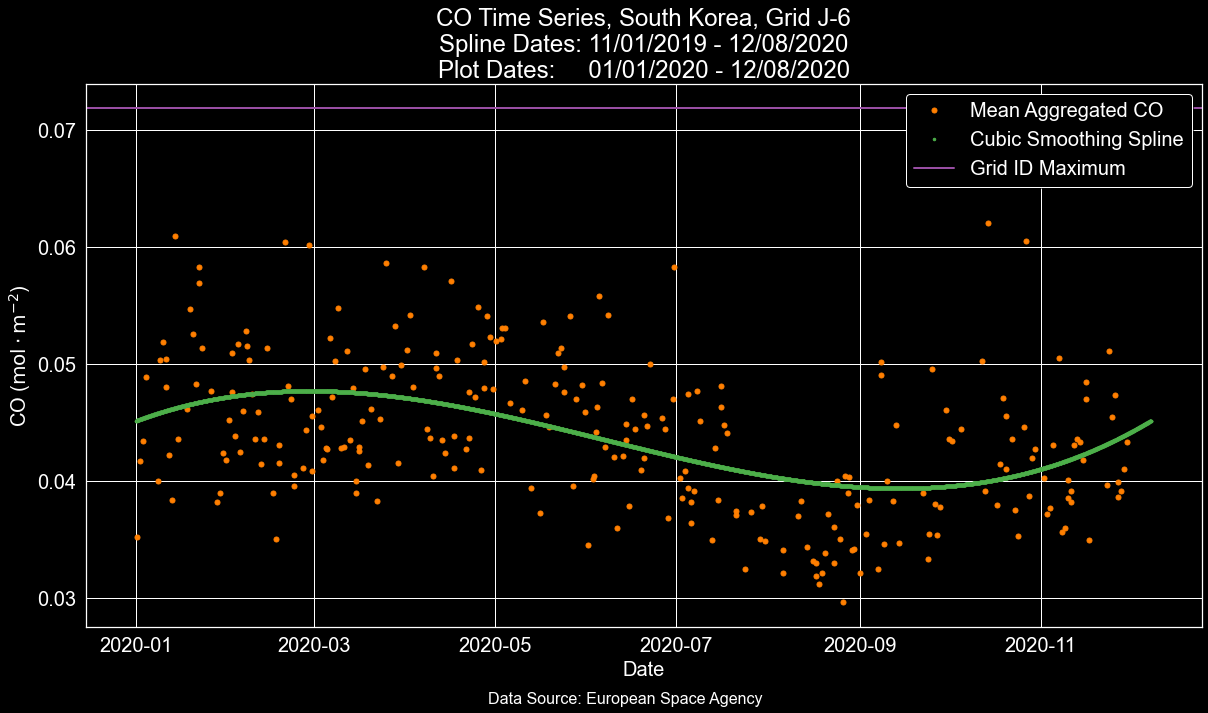

<IPython.core.display.Javascript object>

In [16]:
# Plot data and spline for 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-11-01",
    spline_end="2020-12-08",
    plot_start="2020-01-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2020-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2018-aug-2019-grid-j6.png


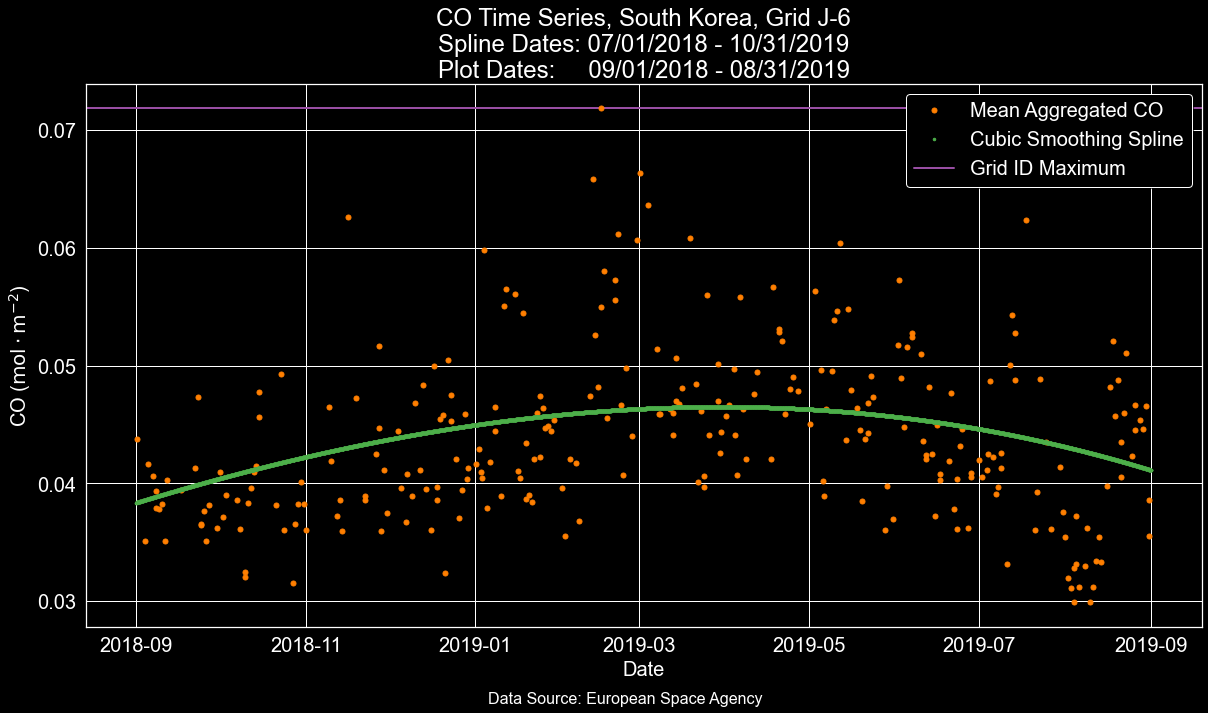

<IPython.core.display.Javascript object>

In [17]:
# Plot data and spline for Sep 2018 - Aug 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-10-31",
    plot_start="2018-09-01",
    plot_end="2019-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2018-aug-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2019-aug-2020-grid-j6.png


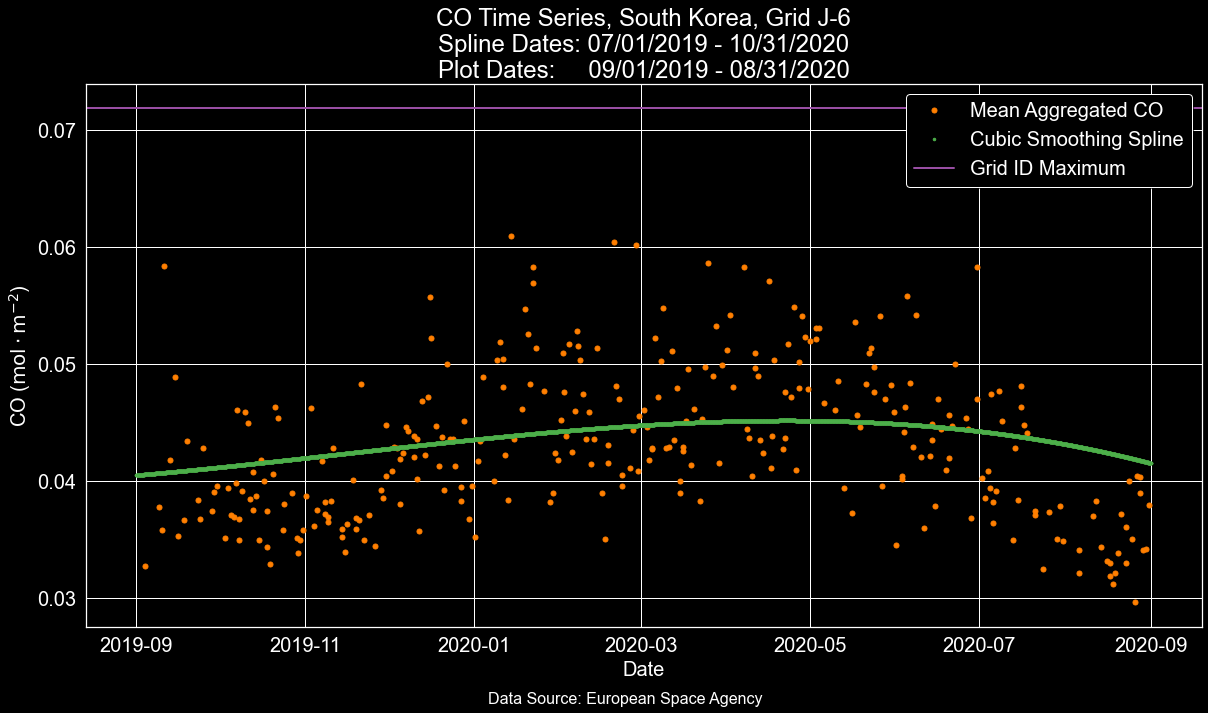

<IPython.core.display.Javascript object>

In [18]:
# Plot data and spline for Sep 2019 - Aug 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-07-01",
    spline_end="2020-10-31",
    plot_start="2019-09-01",
    plot_end="2020-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2019-aug-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

#### Grid I-6

In [19]:
# Set grid cell (for saving figure)
grid_cell = "I-6"

<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2018-jun-2019-grid-i6.png


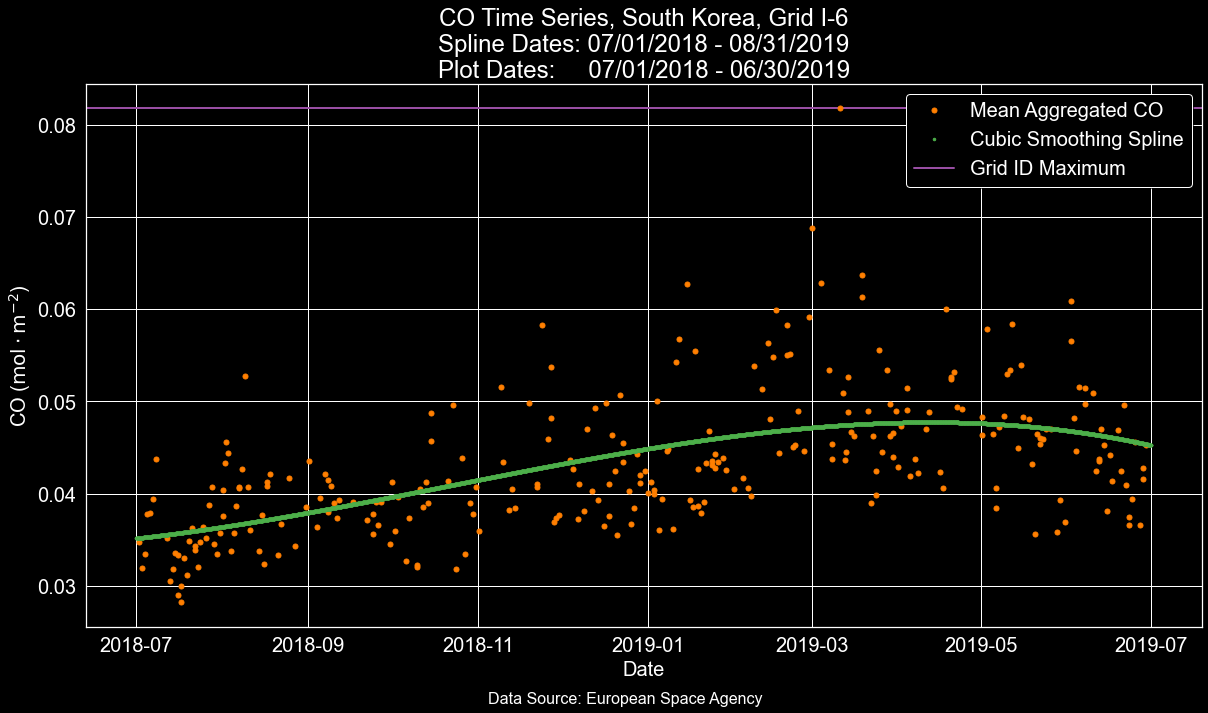

<IPython.core.display.Javascript object>

In [20]:
# Plot data and spline for 2018-07-01 to 2019-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-08-31",
    plot_start="2018-07-01",
    plot_end="2019-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-jun-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

In [21]:
# Get spline coefficients, knots, and residual
coefficients, knots, residual = stl.get_spline_details(spline)
print(f"Coefficients: {coefficients}")
print(f"Knots:        {knots}")
print(f"Residual:     {residual}")

Coefficients: [0.03514457 0.03991303 0.05846968 0.03907271]
Knots:        ['2018-07-01T03:02:35.000000000' '2019-08-31T04:52:48.000000000']
Residual:     0.013484292527985225


<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2019-jun-2020-grid-i6.png


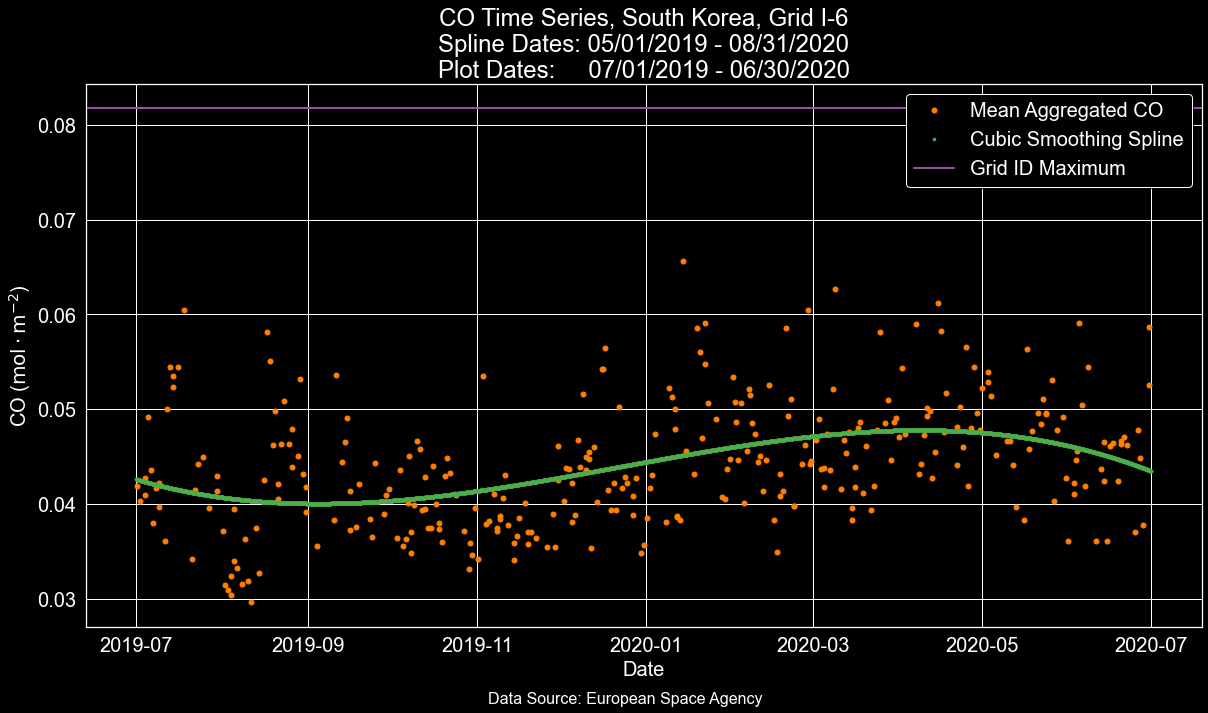

<IPython.core.display.Javascript object>

In [22]:
# Plot data and spline for 2019-07-01 to 2020-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-05-01",
    spline_end="2020-08-31",
    plot_start="2019-07-01",
    plot_end="2020-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2019-jun-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2020-grid-i6.png


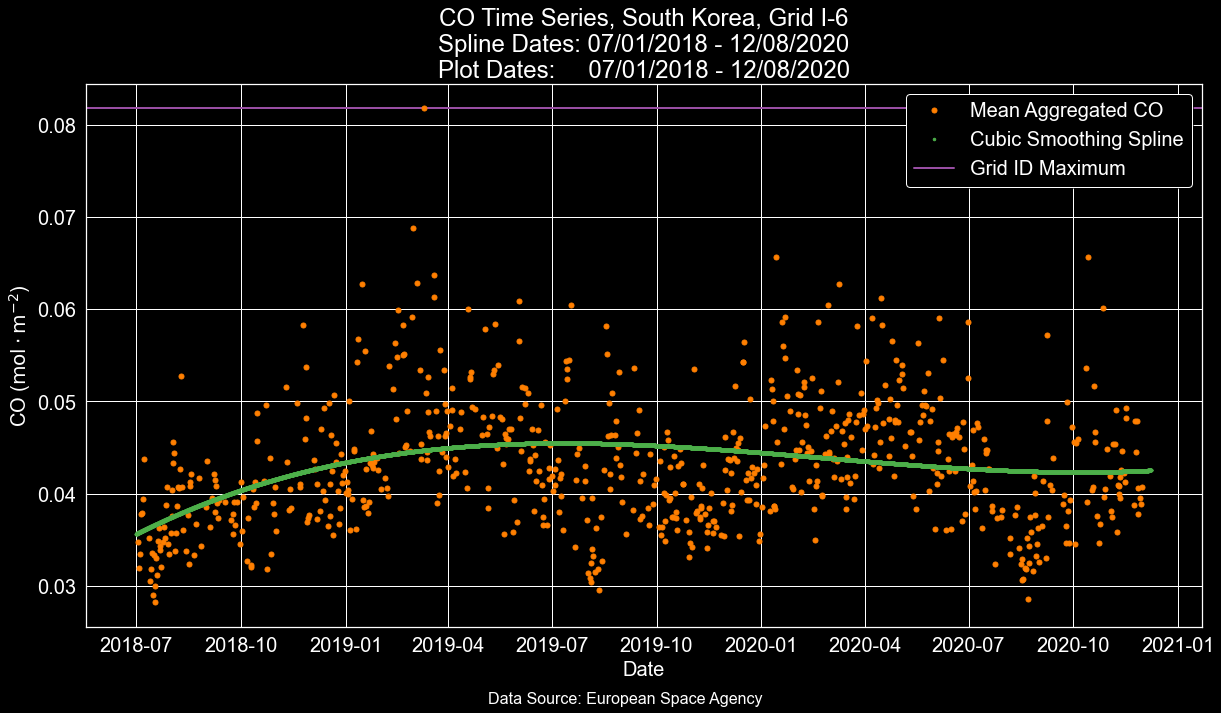

<IPython.core.display.Javascript object>

In [23]:
# Plot data and spline for full time span
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2020-12-08",
    plot_start="2018-07-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2018-grid-i6.png


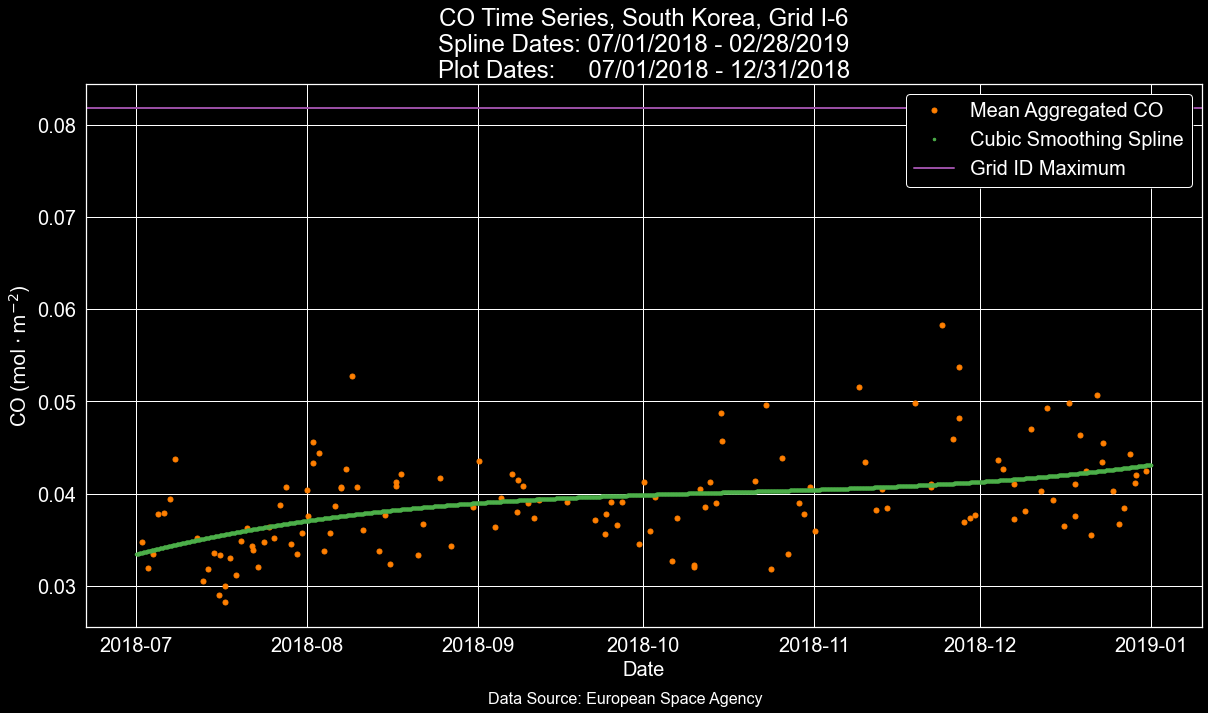

<IPython.core.display.Javascript object>

In [24]:
# Plot data and spline for 2018
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-02-28",
    plot_start="2018-07-01",
    plot_end="2018-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2018-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

rd.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2019-dec-2019-grid-i6.png


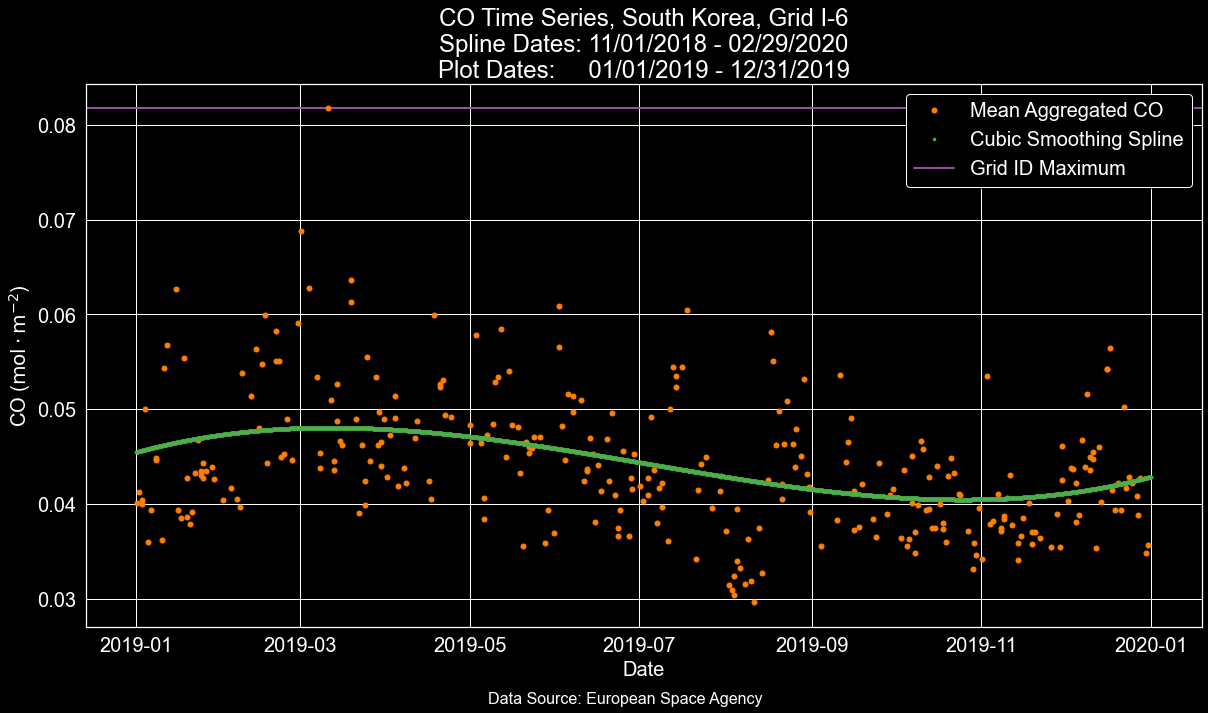

<IPython.core.display.Javascript object>

In [25]:
# Plot data and spline for 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-11-01",
    spline_end="2020-02-29",
    plot_start="2019-01-01",
    plot_end="2019-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2019-dec-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2020-dec-2020-grid-i6.png


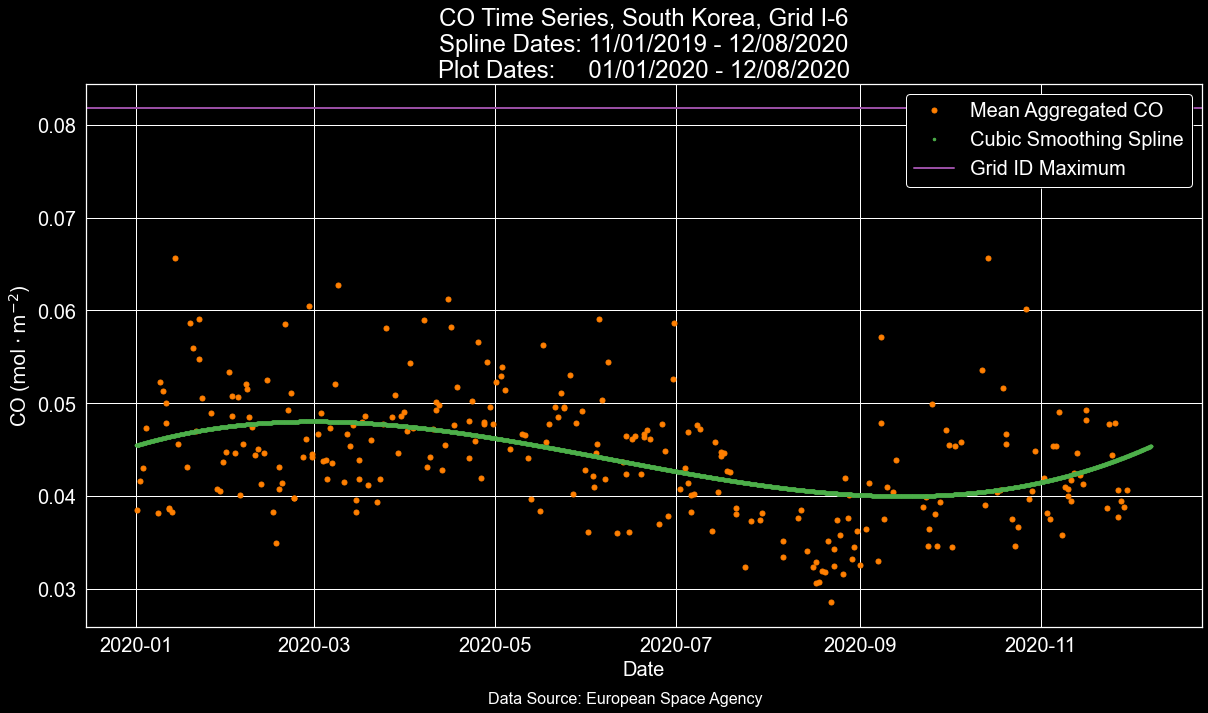

<IPython.core.display.Javascript object>

In [26]:
# Plot data and spline for 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-11-01",
    spline_end="2020-12-08",
    plot_start="2020-01-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2020-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2018-aug-2019-grid-i6.png


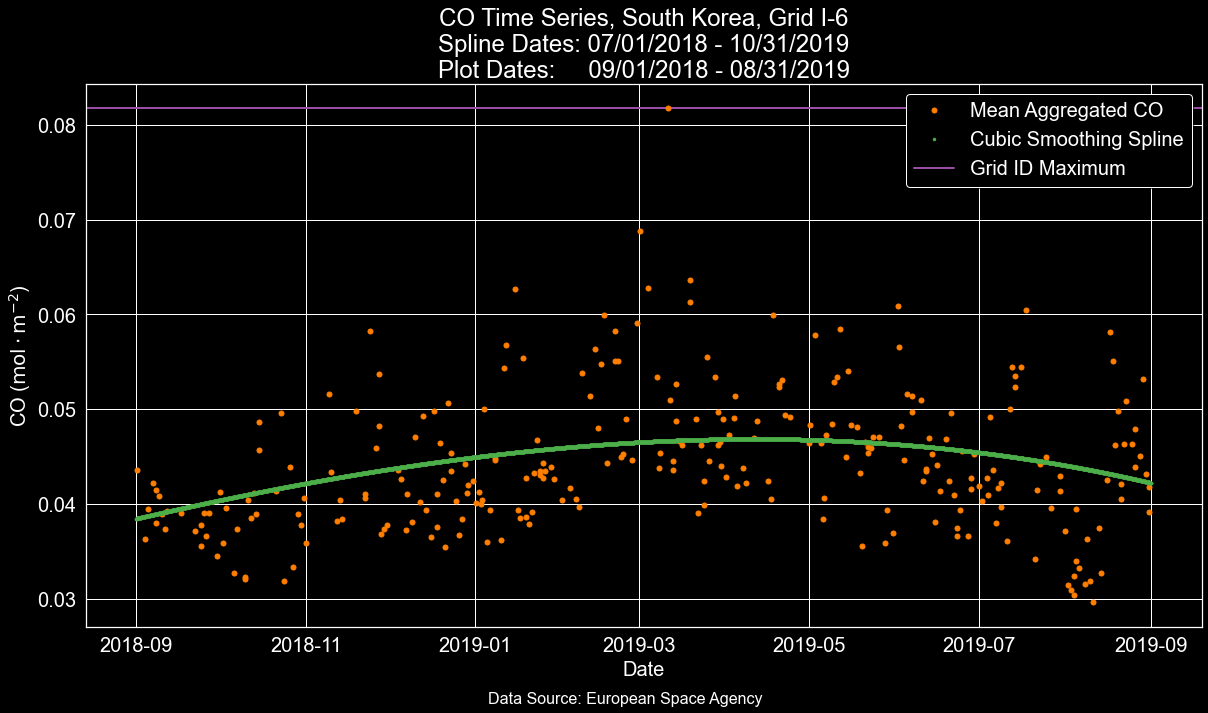

<IPython.core.display.Javascript object>

In [27]:
# Plot data and spline for Sep 2018 - Aug 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-10-31",
    plot_start="2018-09-01",
    plot_end="2019-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2018-aug-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2019-aug-2020-grid-i6.png


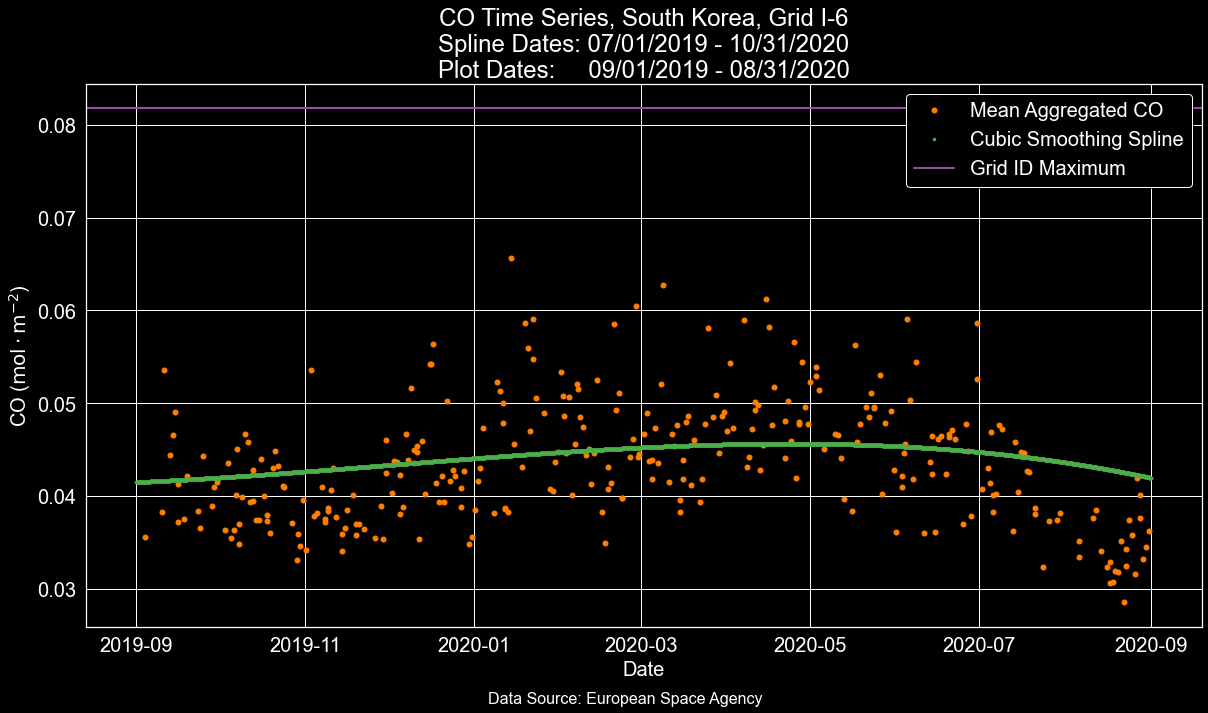

<IPython.core.display.Javascript object>

In [28]:
# Plot data and spline for Sep 2019 - Aug 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-07-01",
    spline_end="2020-10-31",
    plot_start="2019-09-01",
    plot_end="2020-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2019-aug-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

### Rural Area to the East - Low

#### Grid S-9

In [29]:
# Set grid cell (for saving figure)
grid_cell = "S-9"

<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2018-jun-2019-grid-s9.png


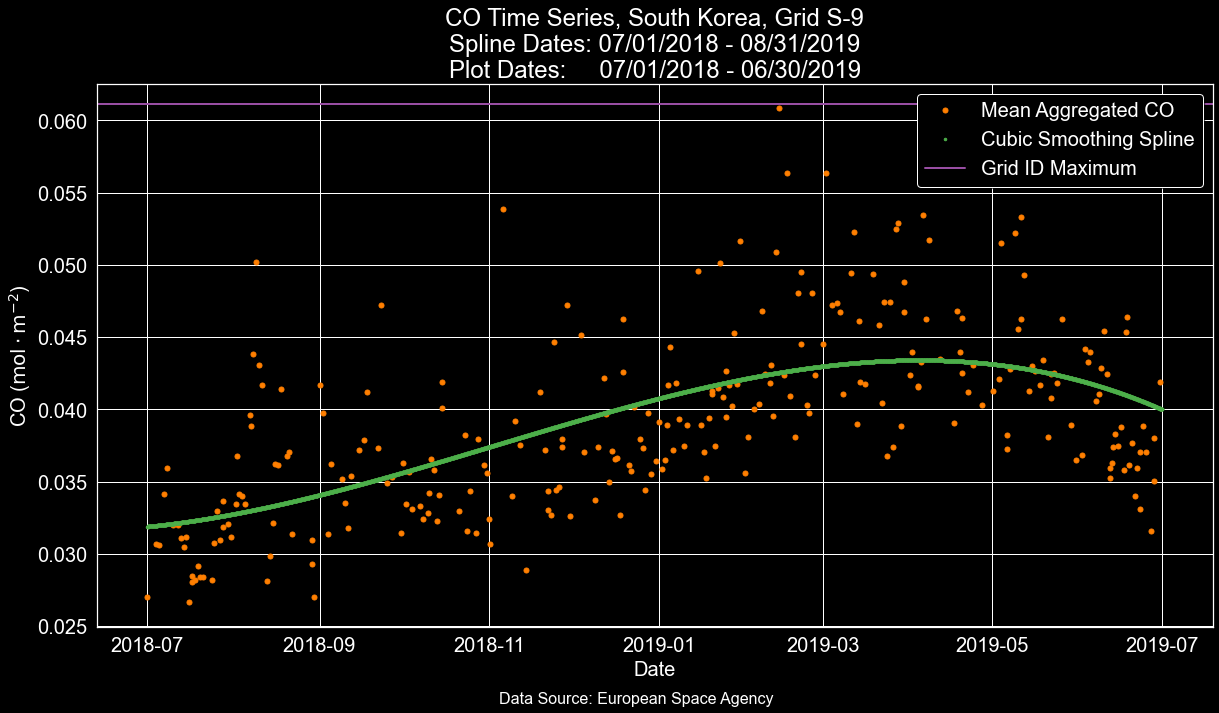

<IPython.core.display.Javascript object>

In [30]:
# Plot data and spline for 2018-07-01 to 2019-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-08-31",
    plot_start="2018-07-01",
    plot_end="2019-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-jun-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

In [31]:
# Get spline coefficients, knots, and residual
coefficients, knots, residual = stl.get_spline_details(spline)
print(f"Coefficients: {coefficients}")
print(f"Knots:        {knots}")
print(f"Residual:     {residual}")

Coefficients: [0.03188806 0.03464508 0.05606631 0.03239443]
Knots:        ['2018-07-01T03:02:35.000000000' '2019-08-31T04:52:48.000000000']
Residual:     0.008512658941005918


<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2019-jun-2020-grid-s9.png


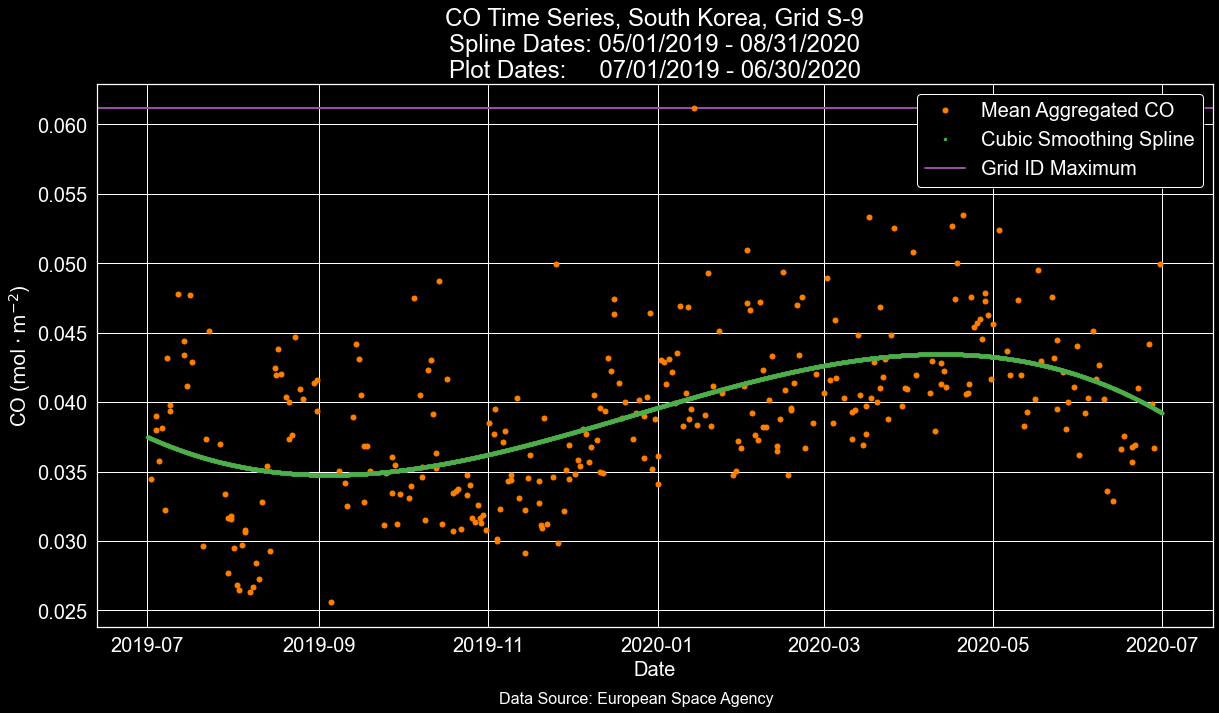

<IPython.core.display.Javascript object>

In [32]:
# Plot data and spline for 2019-07-01 to 2020-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-05-01",
    spline_end="2020-08-31",
    plot_start="2019-07-01",
    plot_end="2020-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2019-jun-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2020-grid-s9.png


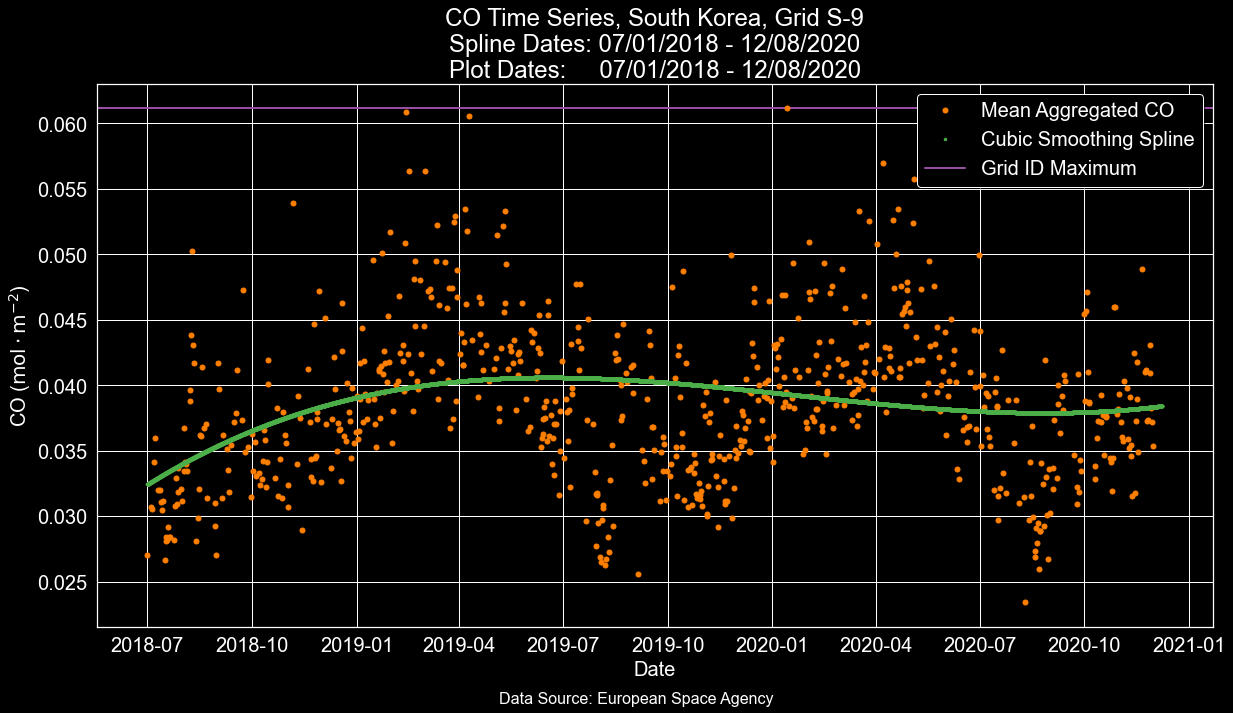

<IPython.core.display.Javascript object>

In [33]:
# Plot data and spline for full time span
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2020-12-08",
    plot_start="2018-07-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2018-grid-s9.png


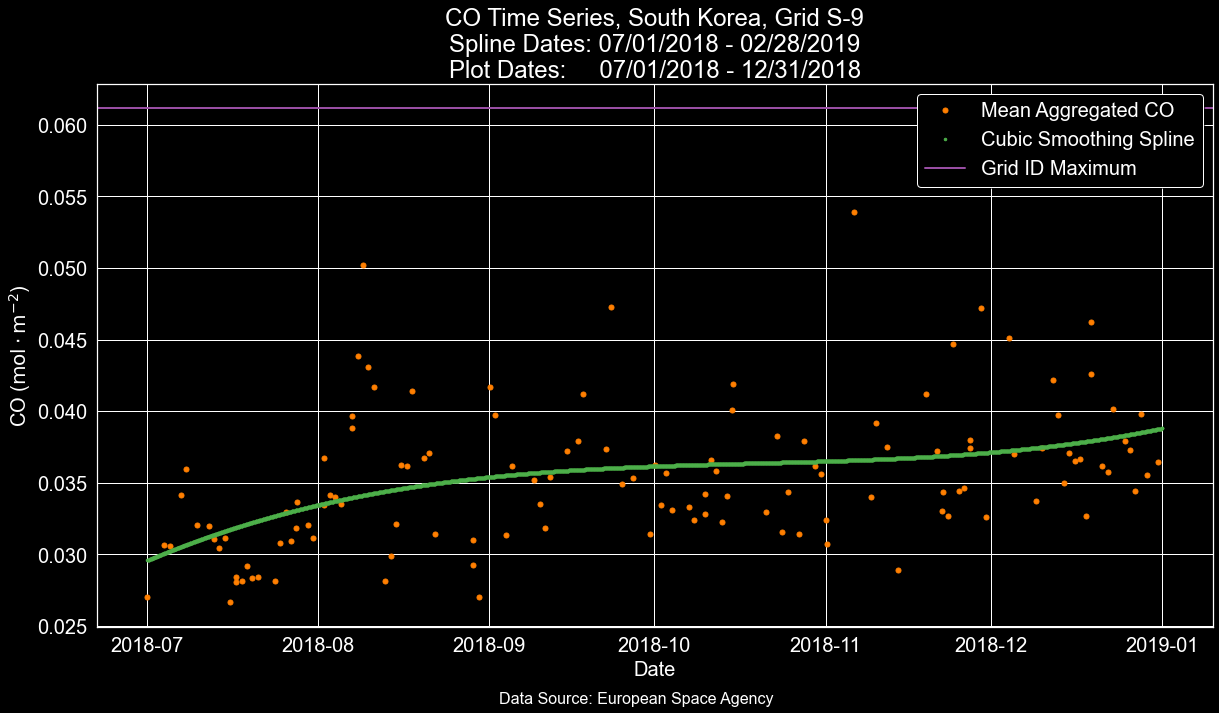

<IPython.core.display.Javascript object>

In [34]:
# Plot data and spline for 2018
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-02-28",
    plot_start="2018-07-01",
    plot_end="2018-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2018-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

rd.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2019-dec-2019-grid-s9.png


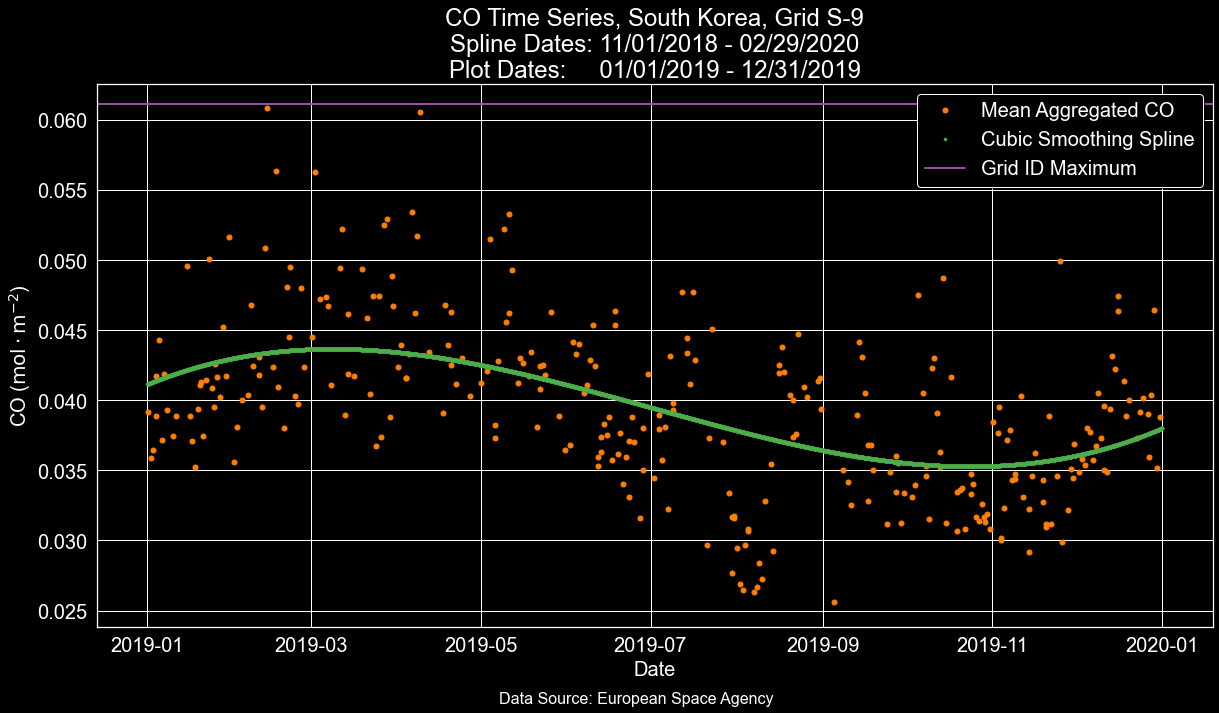

<IPython.core.display.Javascript object>

In [35]:
# Plot data and spline for 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-11-01",
    spline_end="2020-02-29",
    plot_start="2019-01-01",
    plot_end="2019-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2019-dec-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2020-dec-2020-grid-s9.png


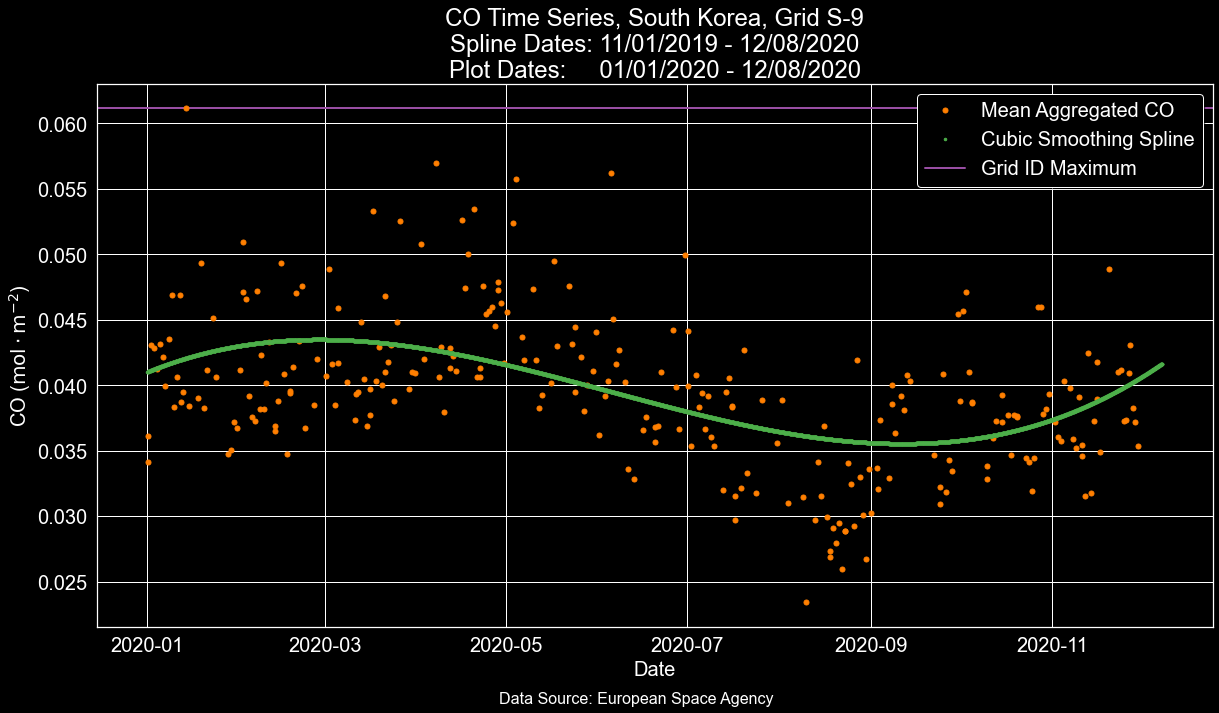

<IPython.core.display.Javascript object>

In [36]:
# Plot data and spline for 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-11-01",
    spline_end="2020-12-08",
    plot_start="2020-01-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2020-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2018-aug-2019-grid-s9.png


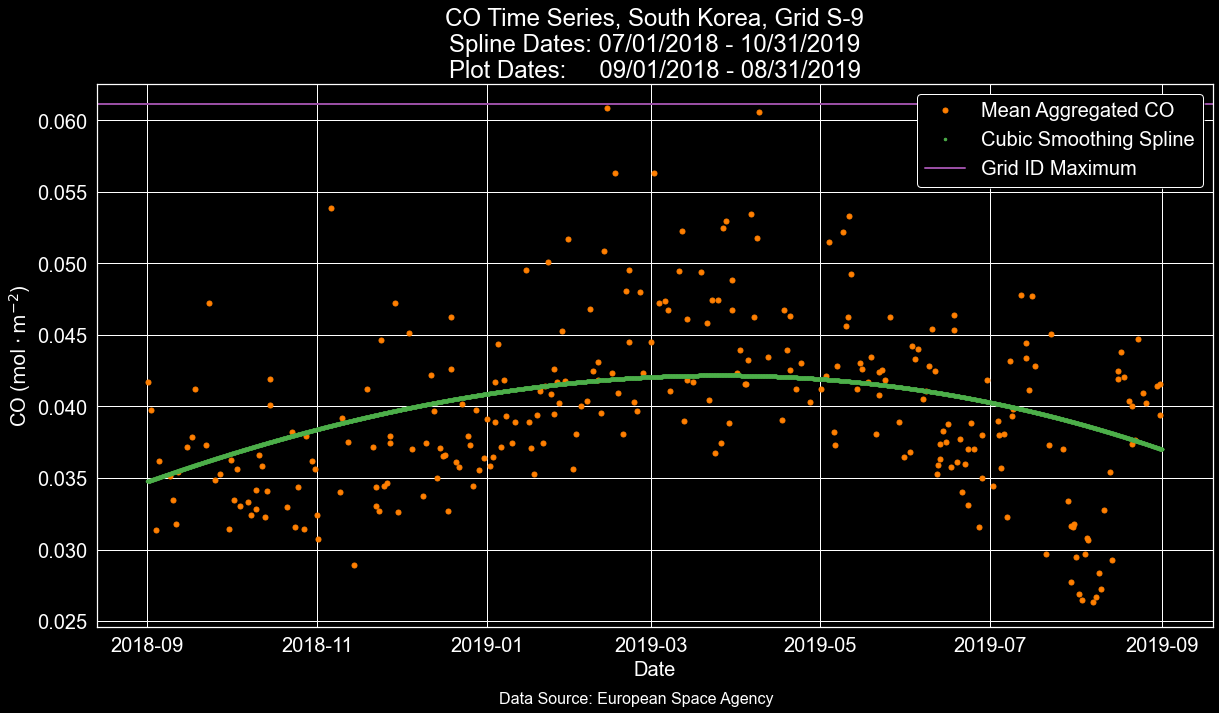

<IPython.core.display.Javascript object>

In [37]:
# Plot data and spline for Sep 2018 - Aug 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-10-31",
    plot_start="2018-09-01",
    plot_end="2019-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2018-aug-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2019-aug-2020-grid-s9.png


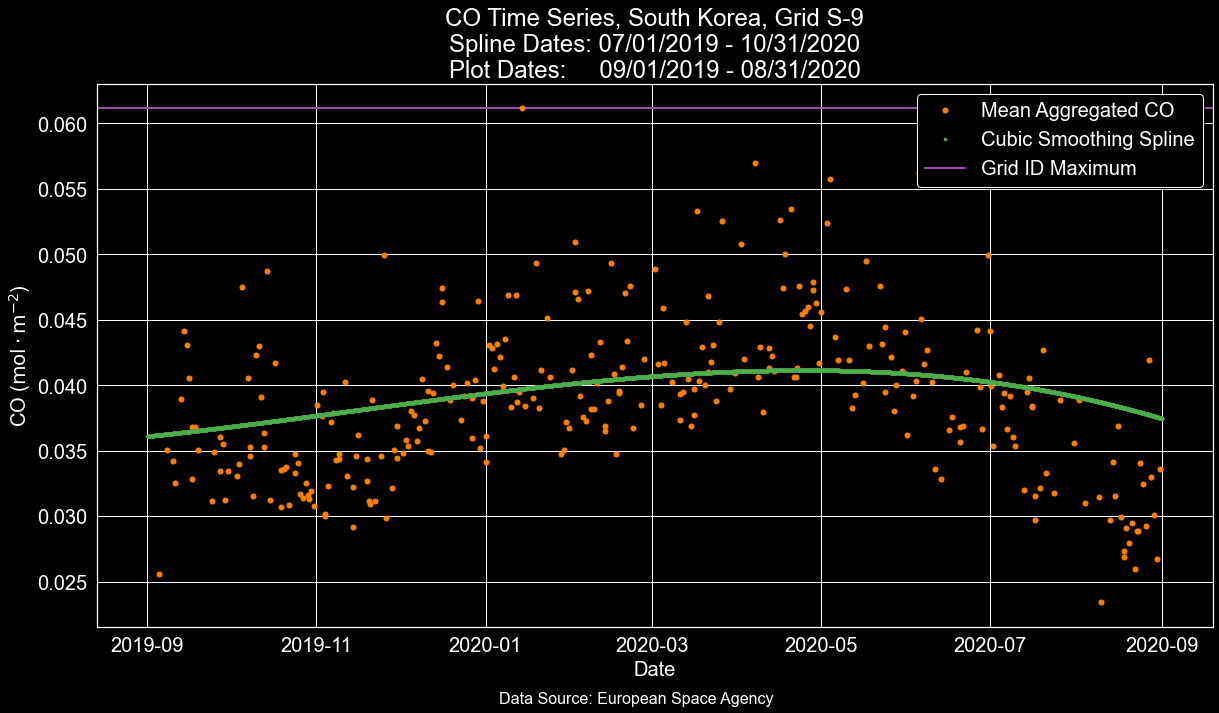

<IPython.core.display.Javascript object>

In [38]:
# Plot data and spline for Sep 2019 - Aug 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-07-01",
    spline_end="2020-10-31",
    plot_start="2019-09-01",
    plot_end="2020-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2019-aug-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

### Southern Coast - High

#### Grid N-17

In [39]:
# Set grid cell (for saving figure)
grid_cell = "N-17"

<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2018-jun-2019-grid-n17.png


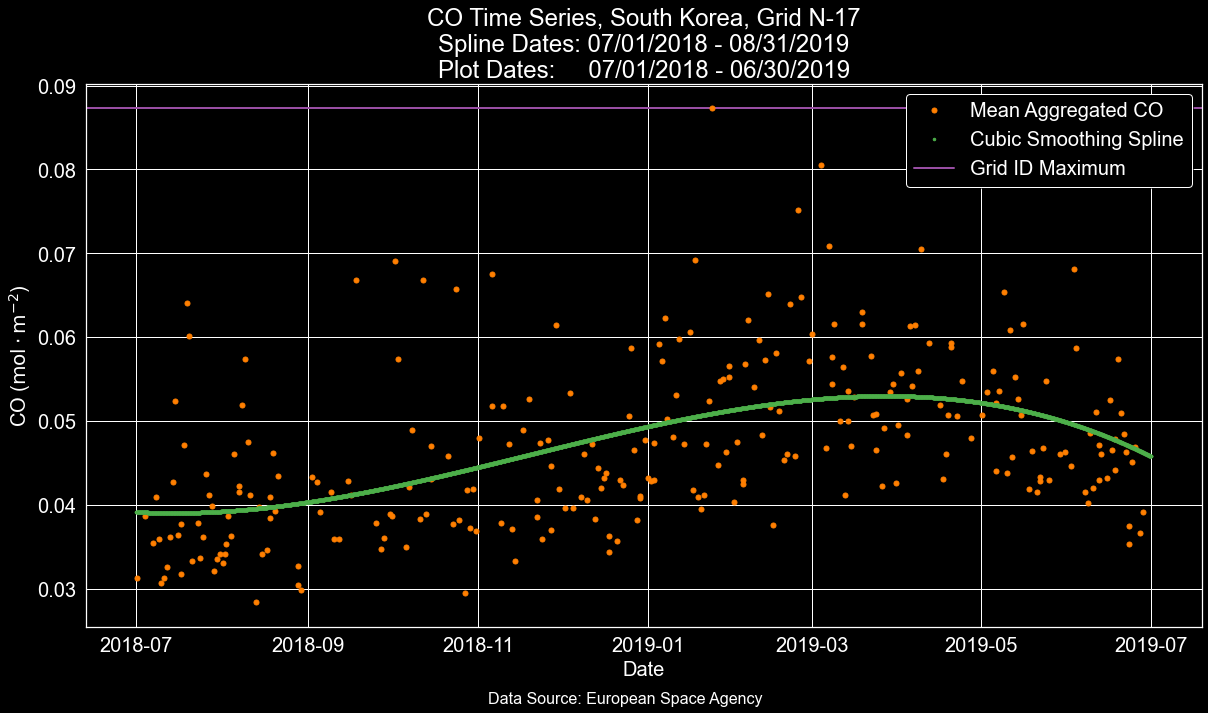

<IPython.core.display.Javascript object>

In [40]:
# Plot data and spline for 2018-07-01 to 2019-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-08-31",
    plot_start="2018-07-01",
    plot_end="2019-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-jun-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

In [41]:
# Get spline coefficients, knots, and residual
coefficients, knots, residual = stl.get_spline_details(spline)
print(f"Coefficients: {coefficients}")
print(f"Knots:        {knots}")
print(f"Residual:     {residual}")

Coefficients: [0.03913492 0.03656071 0.07668911 0.03100604]
Knots:        ['2018-07-01T03:02:35.000000000' '2019-08-31T04:52:48.000000000']
Residual:     0.023101739718106935


<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2019-jun-2020-grid-n17.png


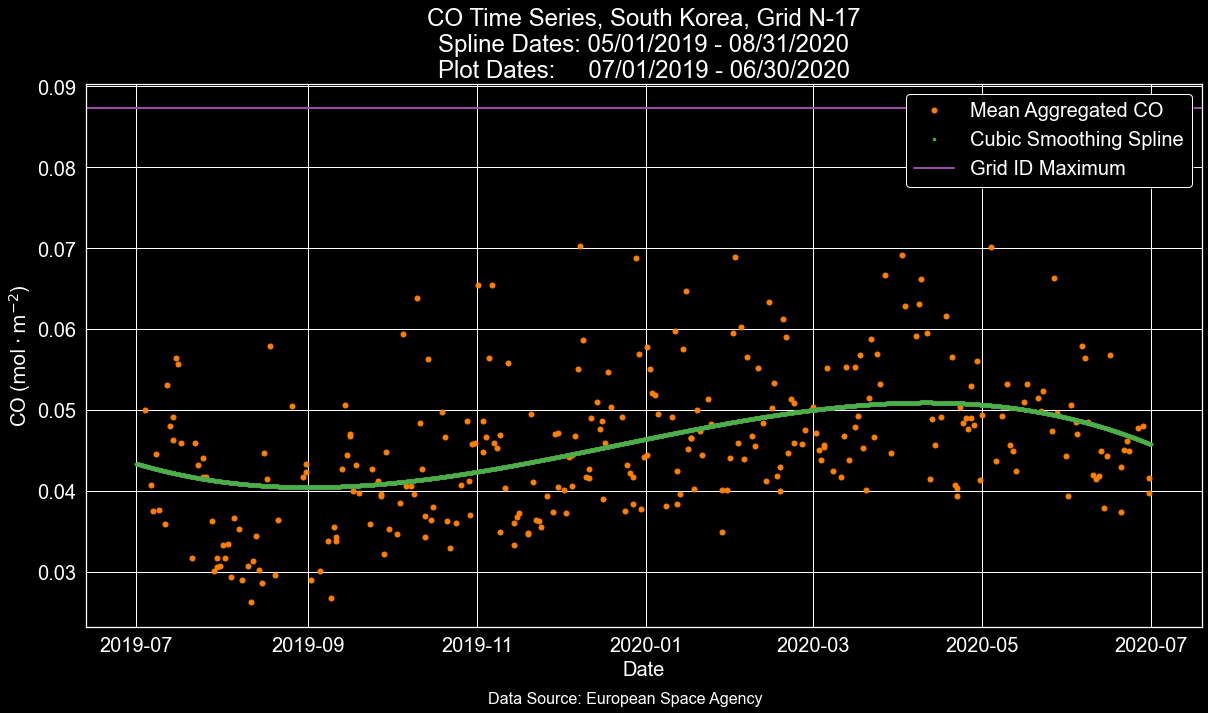

<IPython.core.display.Javascript object>

In [42]:
# Plot data and spline for 2019-07-01 to 2020-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-05-01",
    spline_end="2020-08-31",
    plot_start="2019-07-01",
    plot_end="2020-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2019-jun-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2020-grid-n17.png


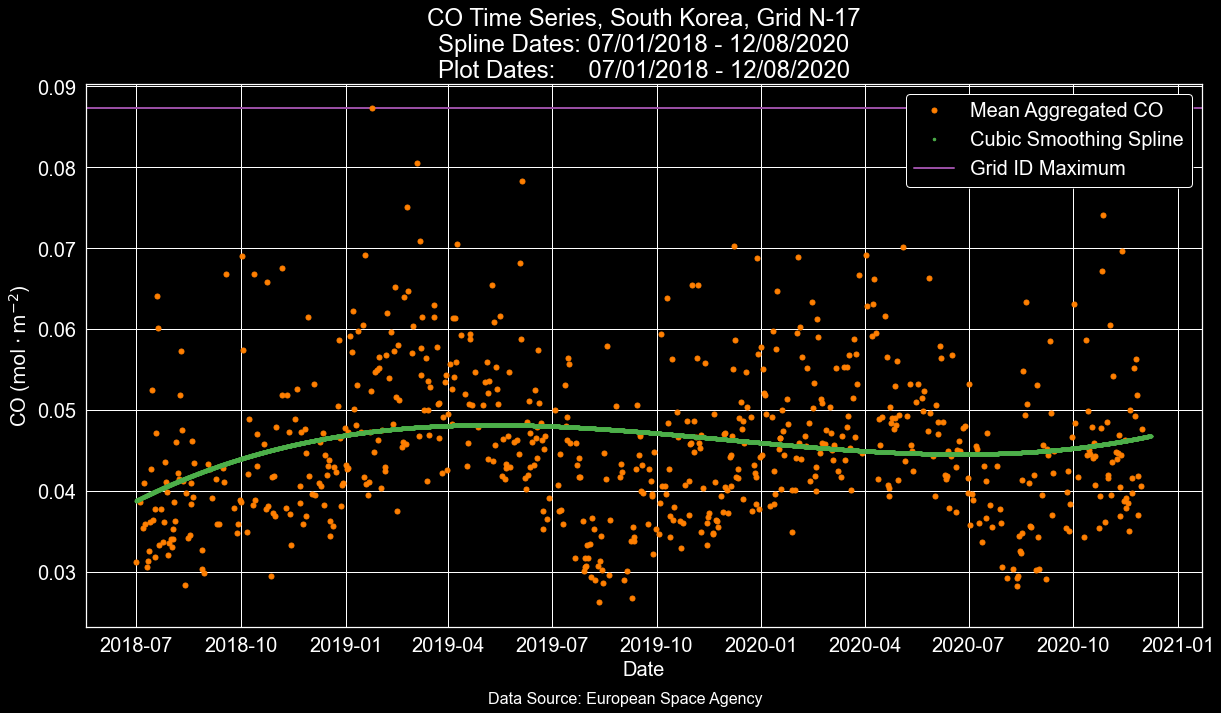

<IPython.core.display.Javascript object>

In [43]:
# Plot data and spline for full time span
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2020-12-08",
    plot_start="2018-07-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2018-grid-n17.png


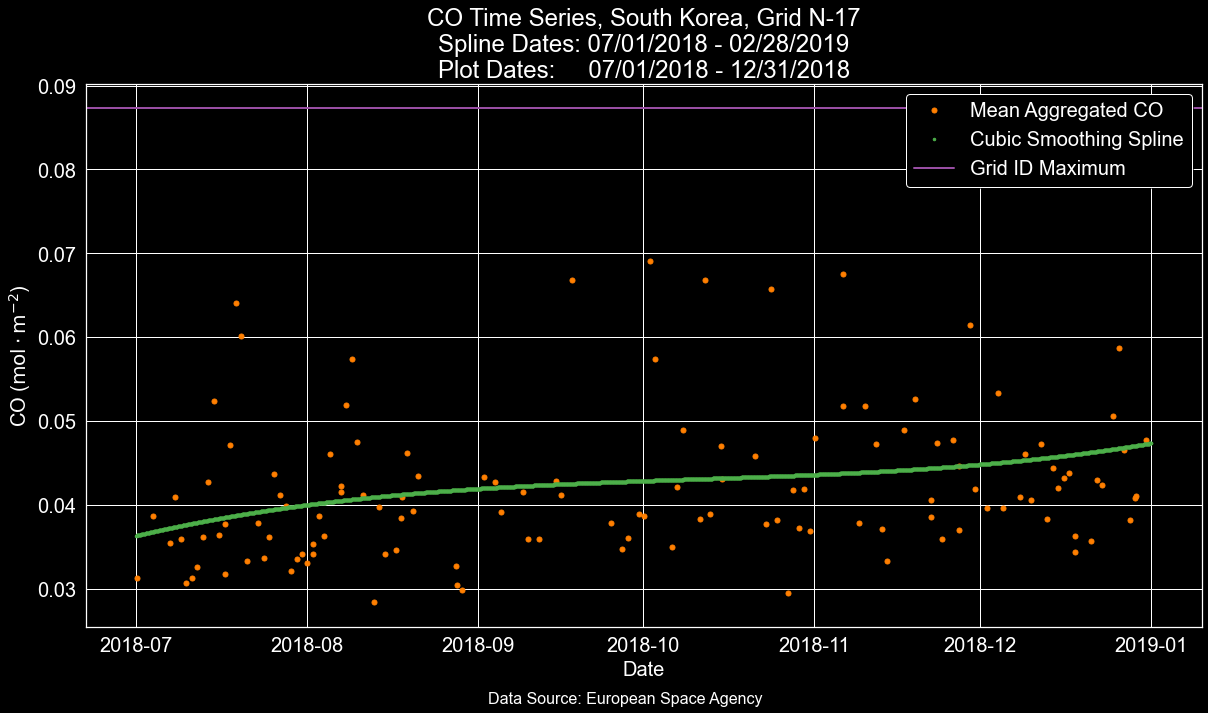

<IPython.core.display.Javascript object>

In [44]:
# Plot data and spline for 2018
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-02-28",
    plot_start="2018-07-01",
    plot_end="2018-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2018-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

rd.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2019-dec-2019-grid-n17.png


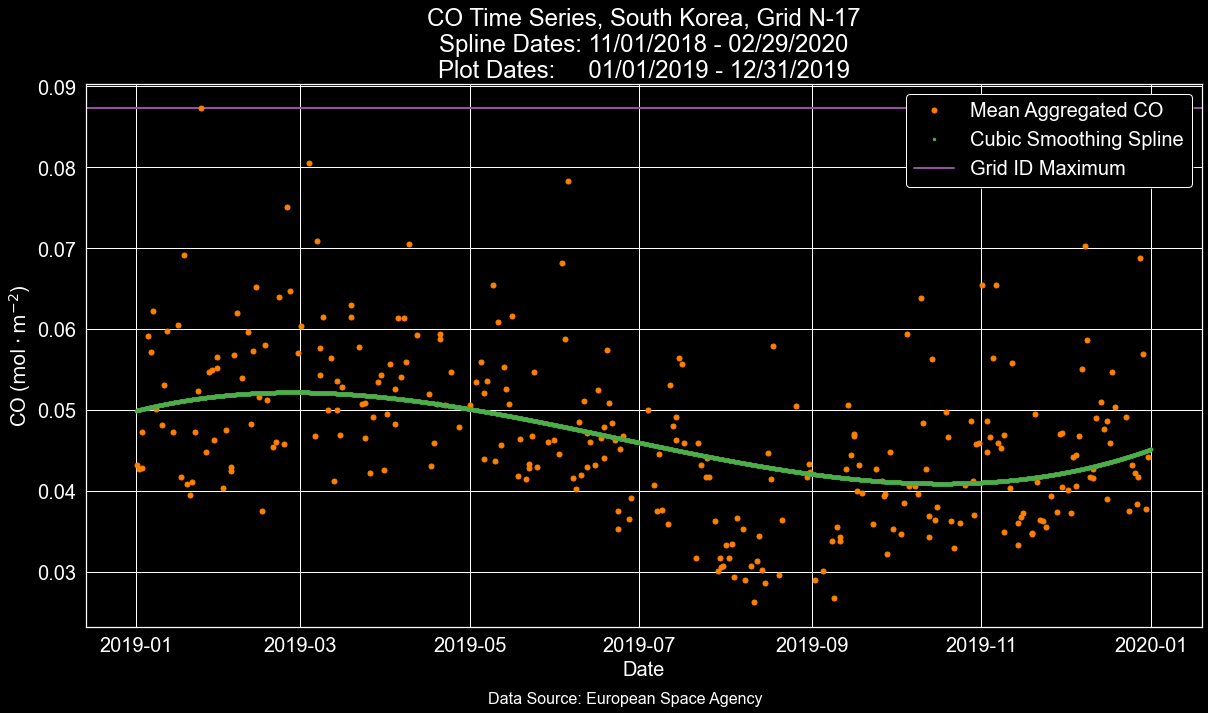

<IPython.core.display.Javascript object>

In [45]:
# Plot data and spline for 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-11-01",
    spline_end="2020-02-29",
    plot_start="2019-01-01",
    plot_end="2019-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2019-dec-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2020-dec-2020-grid-n17.png


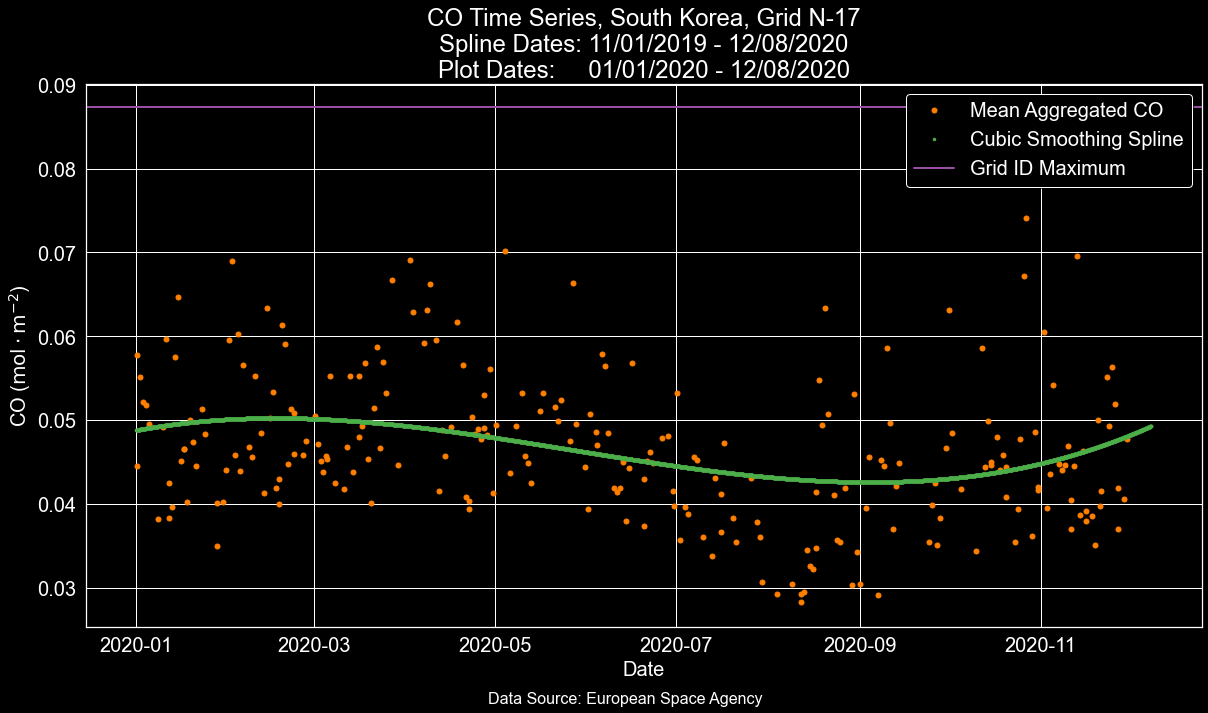

<IPython.core.display.Javascript object>

In [46]:
# Plot data and spline for 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-11-01",
    spline_end="2020-12-08",
    plot_start="2020-01-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2020-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2018-aug-2019-grid-n17.png


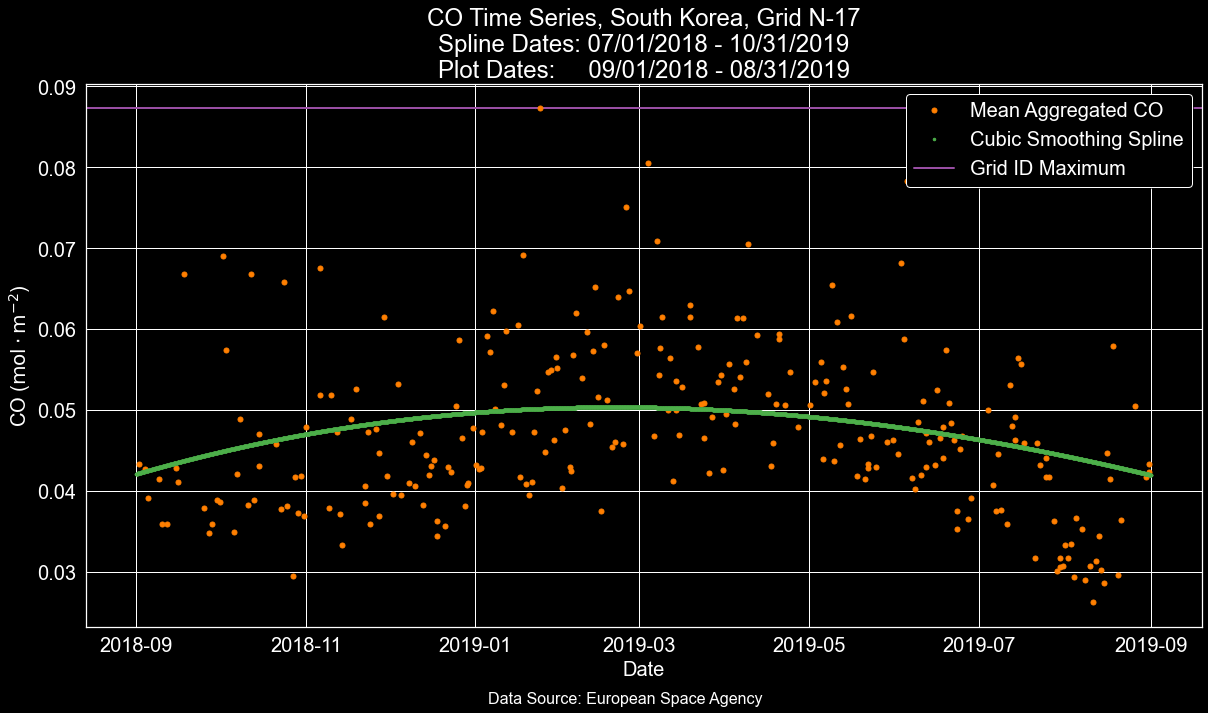

<IPython.core.display.Javascript object>

In [47]:
# Plot data and spline for Sep 2018 - Aug 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-10-31",
    plot_start="2018-09-01",
    plot_end="2019-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2018-aug-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2019-aug-2020-grid-n17.png


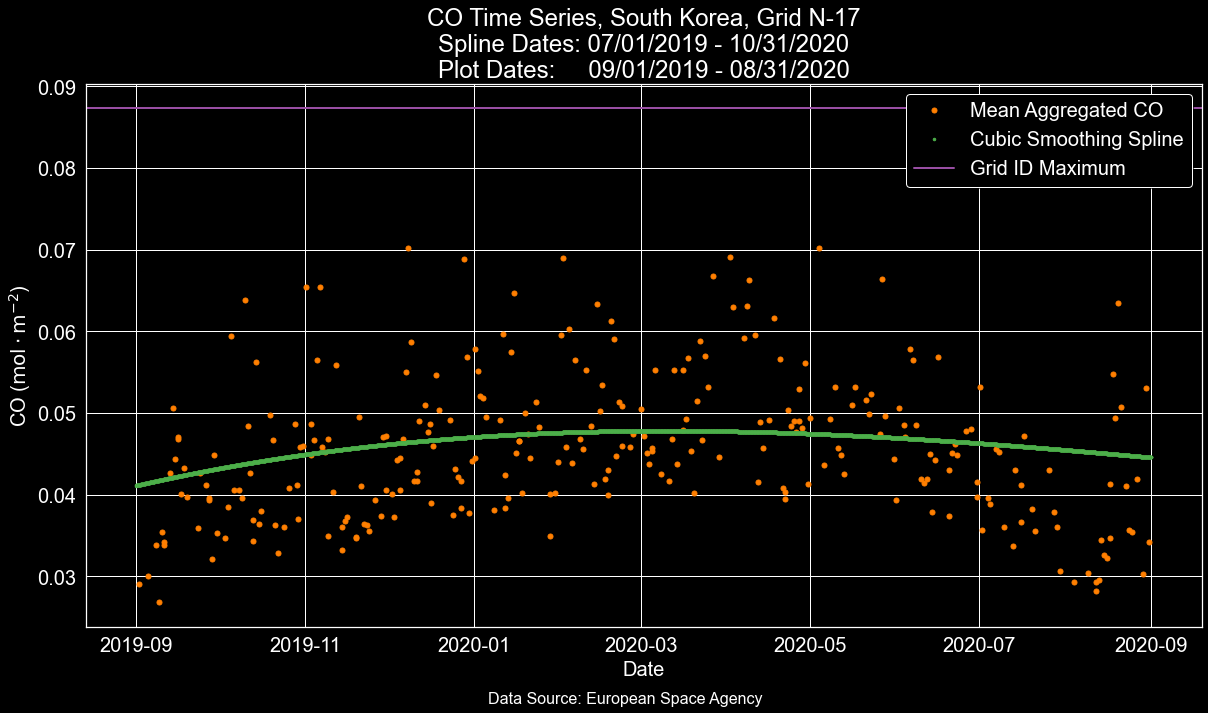

<IPython.core.display.Javascript object>

In [48]:
# Plot data and spline for Sep 2019 - Aug 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-07-01",
    spline_end="2020-10-31",
    plot_start="2019-09-01",
    plot_end="2020-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2019-aug-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

### Rural Area in the Center

#### Grid N-11

In [49]:
# Set grid cell (for saving figure)
grid_cell = "N-11"

<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2018-jun-2019-grid-n11.png


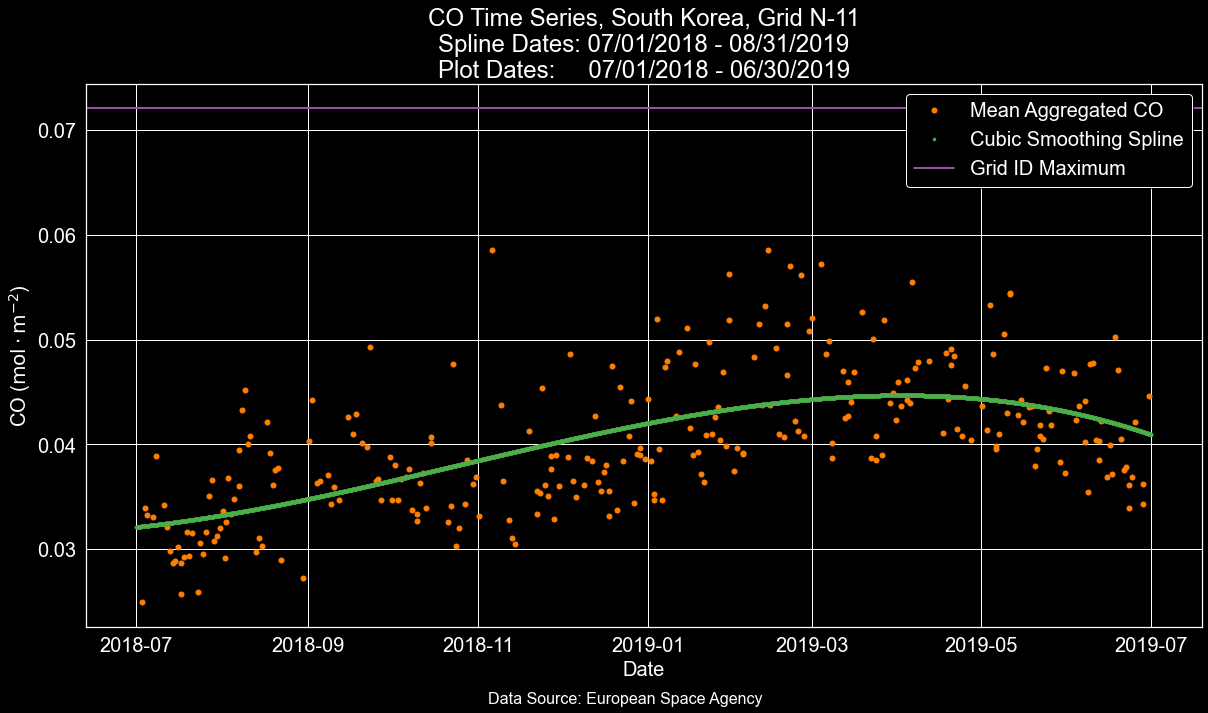

<IPython.core.display.Javascript object>

In [50]:
# Plot data and spline for 2018-07-01 to 2019-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-08-31",
    plot_start="2018-07-01",
    plot_end="2019-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-jun-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

In [51]:
# Get spline coefficients, knots, and residual
coefficients, knots, residual = stl.get_spline_details(spline)
print(f"Coefficients: {coefficients}")
print(f"Knots:        {knots}")
print(f"Residual:     {residual}")

Coefficients: [0.03210474 0.03616536 0.05778006 0.03289787]
Knots:        ['2018-07-01T03:02:35.000000000' '2019-08-31T04:52:48.000000000']
Residual:     0.009684369245791484


<IPython.core.display.Javascript object>

Saved plot: co-daily-time-series-spline-jul-2019-jun-2020-grid-n11.png


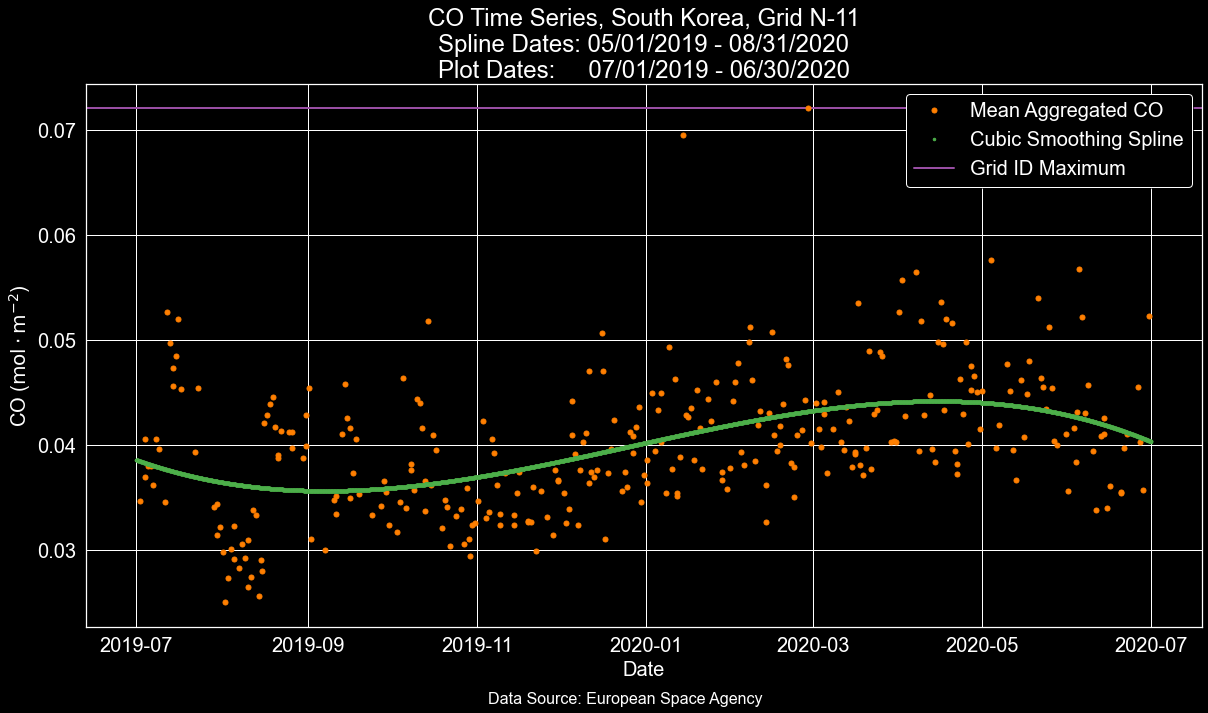

<IPython.core.display.Javascript object>

In [52]:
# Plot data and spline for 2019-07-01 to 2020-06-30
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-05-01",
    spline_end="2020-08-31",
    plot_start="2019-07-01",
    plot_end="2020-06-30",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2019-jun-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2020-grid-n11.png


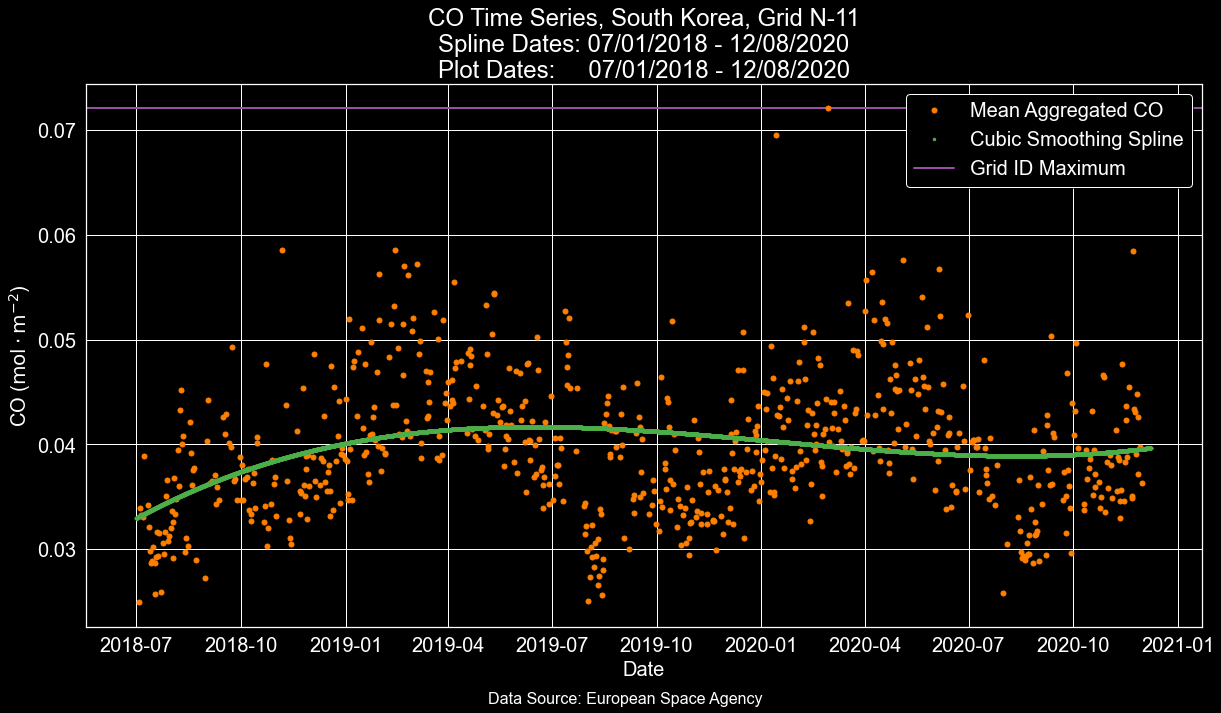

<IPython.core.display.Javascript object>

In [53]:
# Plot data and spline for full time span
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2020-12-08",
    plot_start="2018-07-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jul-2018-dec-2018-grid-n11.png


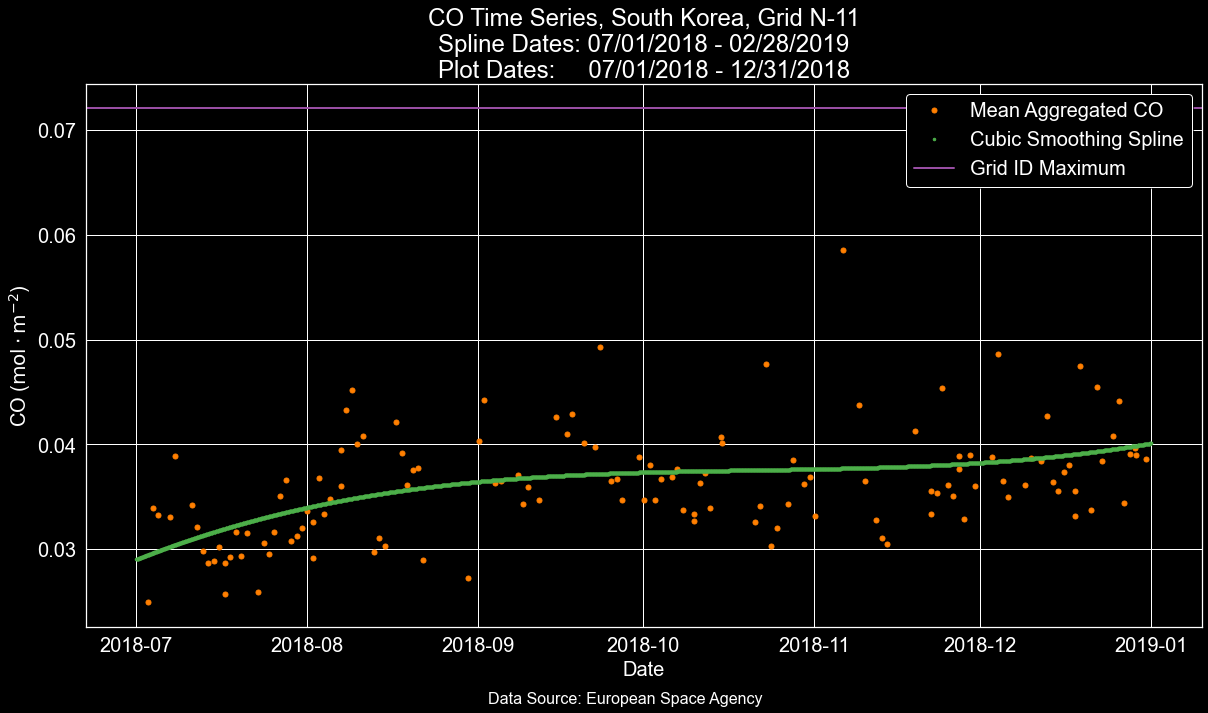

<IPython.core.display.Javascript object>

In [54]:
# Plot data and spline for 2018
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-02-28",
    plot_start="2018-07-01",
    plot_end="2018-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jul-2018-dec-2018-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

rd.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2019-dec-2019-grid-n11.png


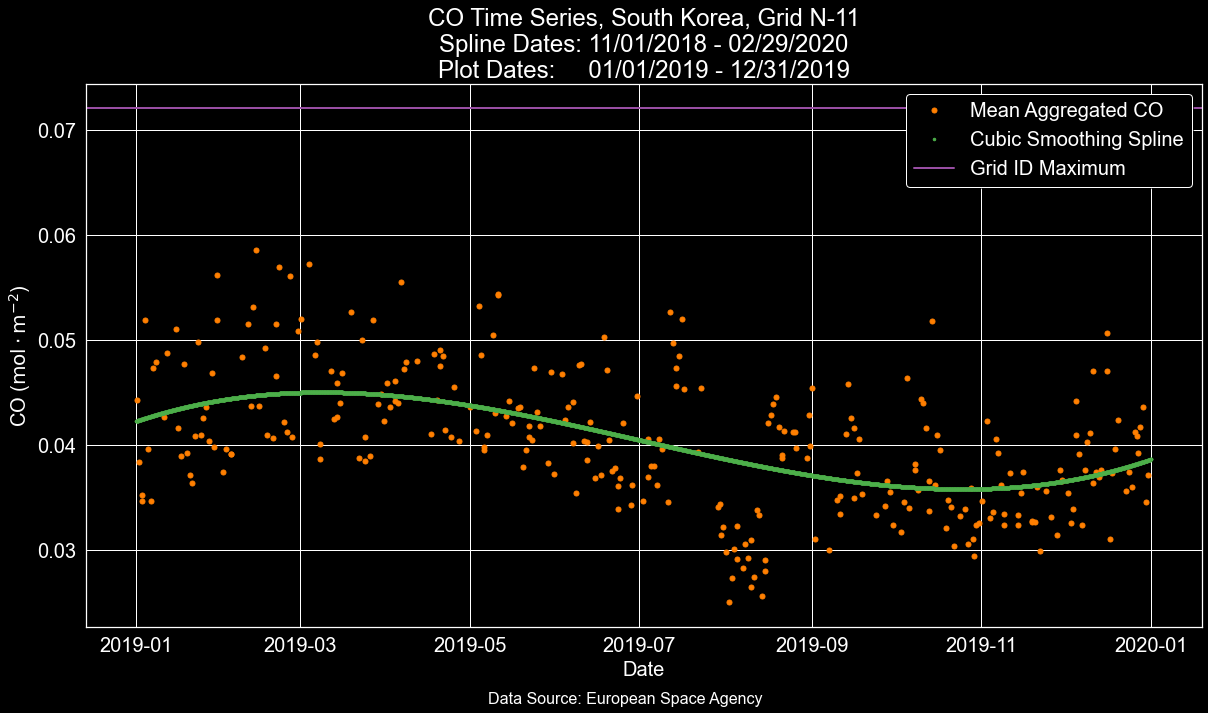

<IPython.core.display.Javascript object>

In [55]:
# Plot data and spline for 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-11-01",
    spline_end="2020-02-29",
    plot_start="2019-01-01",
    plot_end="2019-12-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2019-dec-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-jan-2020-dec-2020-grid-n11.png


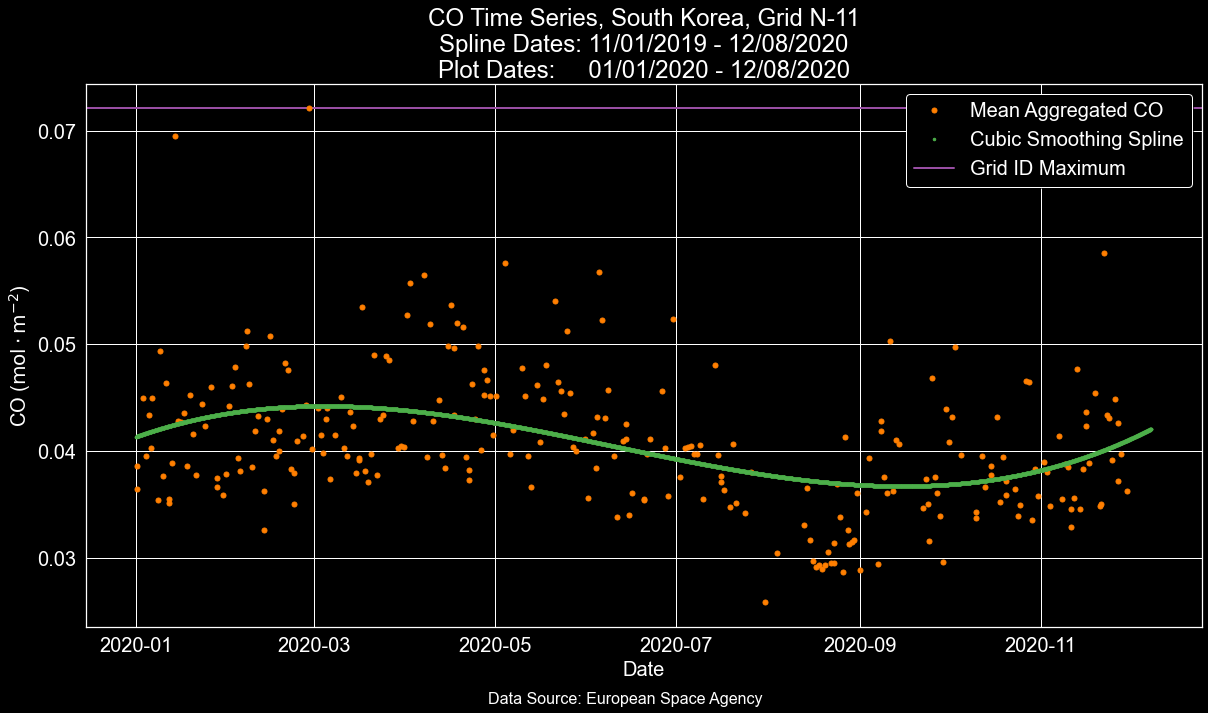

<IPython.core.display.Javascript object>

In [56]:
# Plot data and spline for 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-11-01",
    spline_end="2020-12-08",
    plot_start="2020-01-01",
    plot_end="2020-12-08",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-jan-2020-dec-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2018-aug-2019-grid-n11.png


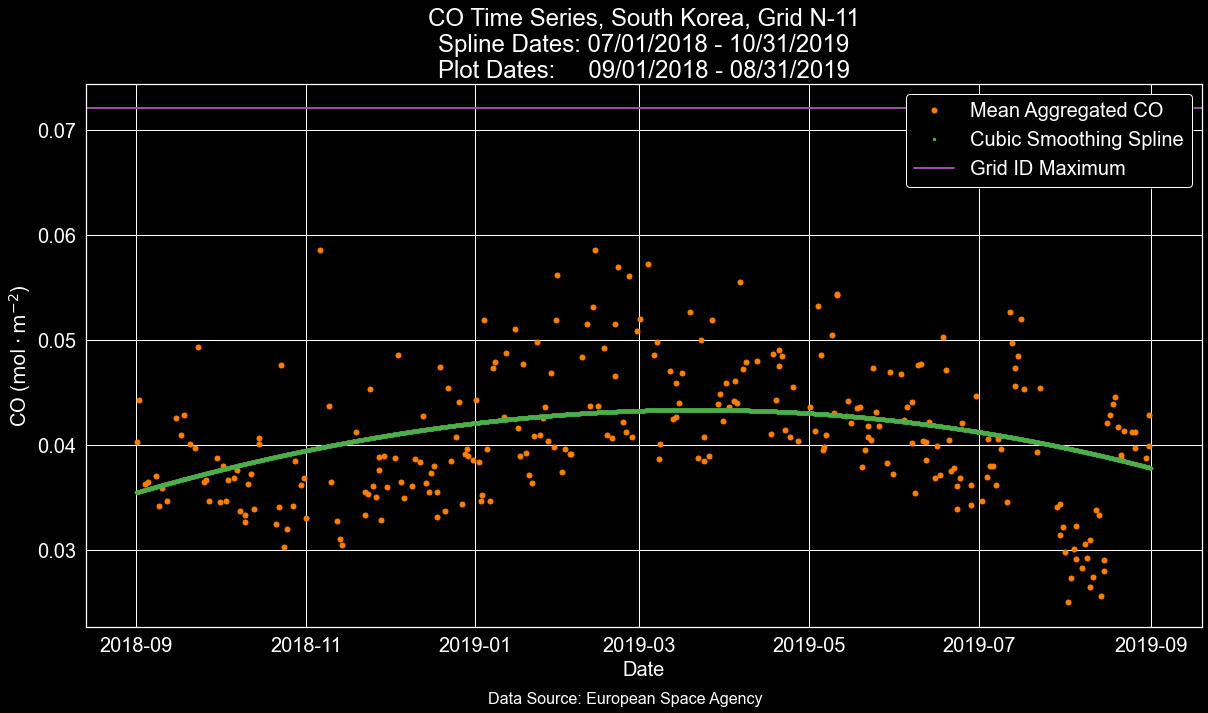

<IPython.core.display.Javascript object>

In [57]:
# Plot data and spline for Sep 2018 - Aug 2019
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2018-07-01",
    spline_end="2019-10-31",
    plot_start="2018-09-01",
    plot_end="2019-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2018-aug-2019-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

Saved plot: co-daily-time-series-spline-sep-2019-aug-2020-grid-n11.png


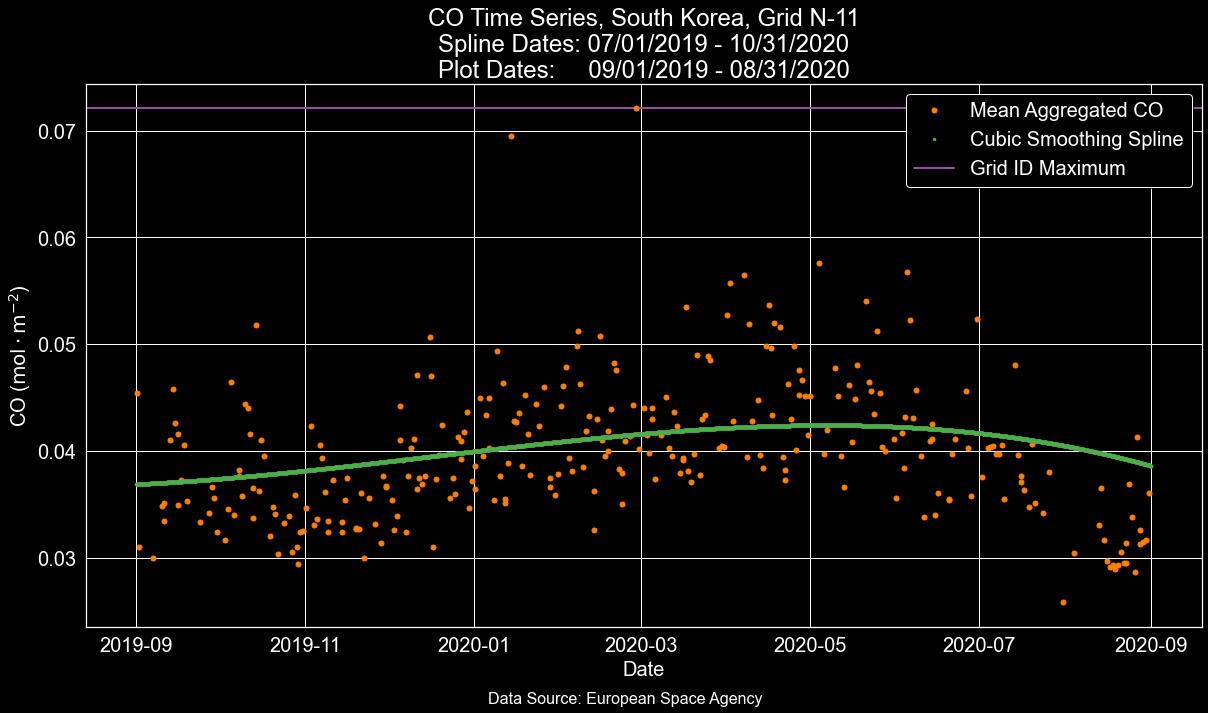

<IPython.core.display.Javascript object>

In [58]:
# Plot data and spline for Sep 2019 - Aug 2020
fig, ax, spline = stl.plot_spline_co(
    time_series=time_series_df,
    grid_id=grid_cell,
    spline_start="2019-07-01",
    spline_end="2020-10-31",
    plot_start="2019-09-01",
    plot_end="2020-08-31",
    add_study_area_max=False,
    add_grid_cell_max=True,
)

# Export figure
outpath = os.path.join(
    "04-graphics-outputs",
    "time-series",
    "south-korea",
    "carbon-monoxide",
    "spline",
    grid_cell.lower(),
    (
        "co-daily-time-series-spline-sep-2019-aug-2020-grid-"
        f"{grid_cell.lower().replace('-', '')}.png"
    ),
)

stl.save_figure(outpath)

## Statistics Table

Create table showing mean and standard deviation for each cell within the test areas and/or all cells.

# Data Export

In [59]:
# Plot and export daily time series for all grid IDs - without study area max
### CHANGE THIS TO A LOOP FOR SPLINE DATES AND GRID CELLS ###
dates = [
    ("2018-07-01", "2019-08-31", "2018-07-01", "2019-06-30"),
    ("2019-05-01", "2020-08-31", "2019-07-01", "2020-06-30"),
    ("2018-07-01", "2020-12-08", "2018-07-01", "2020-12-08"),
    ("2018-07-01", "2019-02-28", "2018-07-01", "2018-12-31"),
    ("2018-11-01", "2020-02-29", "2019-01-01", "2019-12-31"),
    ("2019-11-01", "2020-12-08", "2020-01-01", "2020-12-08"),
    ("2018-07-01", "2019-10-31", "2018-09-01", "2019-08-31"),
    ("2019-07-01", "2020-10-31", "2019-09-01", "2020-08-31"),
]
grid_cells = ["J-6", "I-6", "S-9", "N-17", "N-11"]
export = True
if export:
    # Loop through all grid cell and date combinations
    for grid_cell in grid_cells:
        for (spline_start, spline_end, plot_start, plot_end) in dates:

            # Plot spline
            fig, ax, spline = stl.plot_spline_co(
                time_series=time_series_df,
                grid_id=grid_cell,
                spline_start=spline_start,
                spline_end=spline_end,
                plot_start=plot_start,
                plot_end=plot_end,
                add_study_area_max=False,
                add_grid_cell_max=True,
            )

            # Save figure
            stl.save_figure(
                os.path.join(
                    "04-graphics-outputs",
                    "time-series",
                    "south-korea",
                    "carbon-monoxide",
                    "spline",
                    grid_cell.lower(),
                    (
                        "co-daily-time-series-spline-"
                        f"{plot_start.replace('-', '')}-"
                        f"{plot_end.replace('-', '')}-"
                        f"grid-{grid_cell.lower().replace('-', '')}.png"
                    ),
                )
            )

            # Close figure
            plt.close()

Saved plot: co-daily-time-series-spline-20180701-20190630-grid-j6.png
Saved plot: co-daily-time-series-spline-20190701-20200630-grid-j6.png
Saved plot: co-daily-time-series-spline-20180701-20201208-grid-j6.png
Saved plot: co-daily-time-series-spline-20180701-20181231-grid-j6.png
Saved plot: co-daily-time-series-spline-20190101-20191231-grid-j6.png
Saved plot: co-daily-time-series-spline-20200101-20201208-grid-j6.png
Saved plot: co-daily-time-series-spline-20180901-20190831-grid-j6.png
Saved plot: co-daily-time-series-spline-20190901-20200831-grid-j6.png
Saved plot: co-daily-time-series-spline-20180701-20190630-grid-i6.png
Saved plot: co-daily-time-series-spline-20190701-20200630-grid-i6.png
Saved plot: co-daily-time-series-spline-20180701-20201208-grid-i6.png
Saved plot: co-daily-time-series-spline-20180701-20181231-grid-i6.png
Saved plot: co-daily-time-series-spline-20190101-20191231-grid-i6.png
Saved plot: co-daily-time-series-spline-20200101-20201208-grid-i6.png
Saved plot: co-daily

<IPython.core.display.Javascript object>